# Bank Churners Predictor

The overarching motivation of this project is to identify which factor is most significant in contributing to customer attrition. By predicting this major problem for business, stakeholders can make data driven decisions in order to lower customer attrition.



Customer churn is a serious problem for businesses. Retaining customers is much more cost-effective than acquiring new customers. This is true in the credit card industry. Research by Reichheld and Sasser (1990) shows that as the defection rate drops by 5%, the average lifespan of a customer doubles, thus raising profits by 75%.

Our project goals are justified by:

*	Feature Importance: By encoding categorical data, using a correlation matrix and perform EDA to identify the most significant feature for predicting attrition.
*	Prediction & Classification: We implement four ML models (SVM, Random Forest, Logistic Regression, & Naive Bayes) in order to determine the probability of customer churn.
*	Dimensionality Reduction: We applied PCA in order to reduce dimensionality and easily identify the strongest features for predicting churn.


In [1]:
import warnings  
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import category_encoders as ce # Encode Categorical Variables

sns.set_style('darkgrid')

In [2]:
pd.options.display.float_format = '{:.4f}'.format
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('BankChurners.csv')

## Data Wrangling

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0000,777,11914.0000,1.3350,1144,42,1.6250,0.0610,0.0001,0.9999
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0000,864,7392.0000,1.5410,1291,33,3.7140,0.1050,0.0001,0.9999
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0000,0,3418.0000,2.5940,1887,20,2.3330,0.0000,0.0000,1.0000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0000,2517,796.0000,1.4050,1171,20,2.3330,0.7600,0.0001,0.9999
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0000,0,4716.0000,2.1750,816,28,2.5000,0.0000,0.0000,1.0000


In [5]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0000,1851,2152.0000,0.7030,15476,117,0.8570,0.4620,0.0002,0.9998
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0000,2186,2091.0000,0.8040,8764,69,0.6830,0.5110,0.9953,0.0047
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0000,0,5409.0000,0.8190,10291,60,0.8180,0.0000,0.9979,0.0021
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0000,0,5281.0000,0.5350,8395,62,0.7220,0.0000,0.9967,0.0033
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0000,1961,8427.0000,0.7030,10294,61,0.6490,0.1890,0.9966,0.0034


In [6]:
df.shape

(10127, 23)

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000,10127.0000
mean,739177606.3337,46.3260,2.3462,35.9284,3.8126,2.3412,2.4553,8631.9537,1162.8141,7469.1396,0.7599,4404.0863,64.8587,0.7122,0.2749,0.1600,0.8400
std,36903783.4502,8.0168,1.2989,7.9864,1.5544,1.0106,1.1062,9088.7767,814.9873,9090.6853,0.2192,3397.1293,23.4726,0.2381,0.2757,0.3653,0.3653
min,708082083.0000,26.0000,0.0000,13.0000,1.0000,0.0000,0.0000,1438.3000,0.0000,3.0000,0.0000,510.0000,10.0000,0.0000,0.0000,0.0000,0.0004
25%,713036770.5000,41.0000,1.0000,31.0000,3.0000,2.0000,2.0000,2555.0000,359.0000,1324.5000,0.6310,2155.5000,45.0000,0.5820,0.0230,0.0001,0.9997
50%,717926358.0000,46.0000,2.0000,36.0000,4.0000,2.0000,2.0000,4549.0000,1276.0000,3474.0000,0.7360,3899.0000,67.0000,0.7020,0.1760,0.0002,0.9998
75%,773143533.0000,52.0000,3.0000,40.0000,5.0000,3.0000,3.0000,11067.5000,1784.0000,9859.0000,0.8590,4741.0000,81.0000,0.8180,0.5030,0.0003,0.9999
max,828343083.0000,73.0000,5.0000,56.0000,6.0000,6.0000,6.0000,34516.0000,2517.0000,34516.0000,3.3970,18484.0000,139.0000,3.7140,0.9990,0.9996,1.0000


In [8]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [9]:
df.duplicated().sum()
# no duplicates: therefore no additional action needed.

0

In [10]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [11]:
print('Total number of observations:', df.shape[0])
print('Total number of attributes:', df.shape[1])

Total number of observations: 10127
Total number of attributes: 23


In [12]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

# Exploratory Data Analysis

### Taking a closer look at the Target Variable

In [13]:
print("Unique values in the attrited column", df['Attrition_Flag'].unique())

Unique values in the attrited column ['Existing Customer' 'Attrited Customer']


In [14]:
count_attrited_col = df['Attrition_Flag'].value_counts()
print(count_attrited_col)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


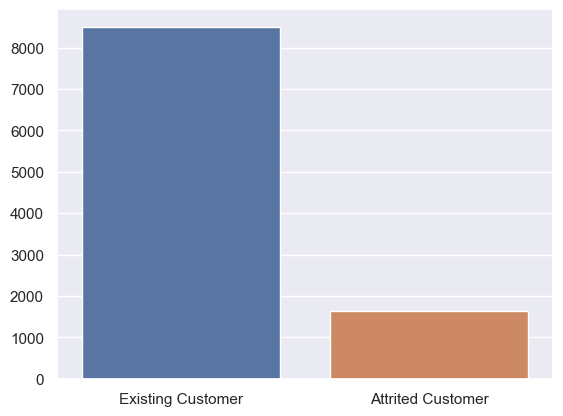

In [15]:
sns.barplot(x = count_attrited_col.index, y = count_attrited_col.values,);

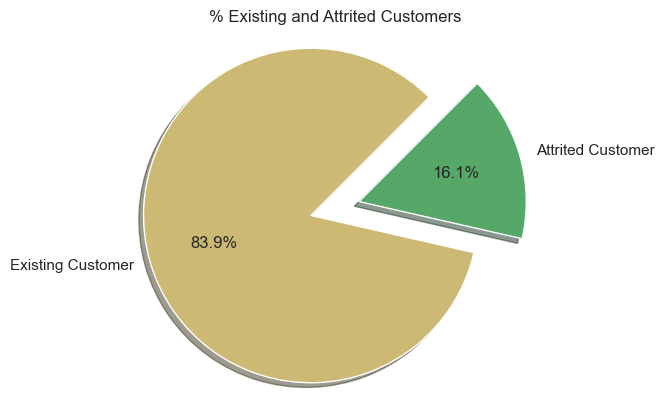

In [16]:
attrition_map = df['Attrition_Flag']
attrition_label = attrition_map.value_counts()

explode = (0.3,0)

plt.pie(attrition_label.values,
        labels=attrition_label.index,
        autopct='%1.1f%%',
        explode=explode,
        startangle=45,        
        shadow=True,
        colors =['y', 'g'])
plt.axis('equal')
plt.title('% Existing and Attrited Customers')

plt.show()

# https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.06-Bar-Charts-and-Pie-Charts/

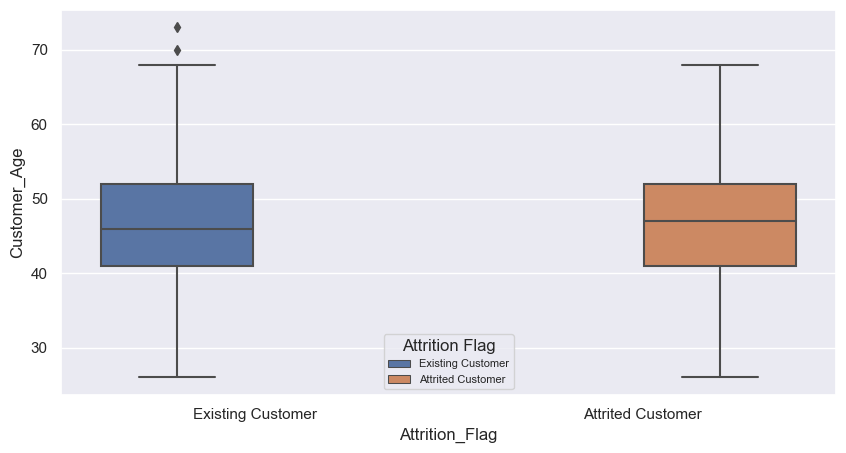

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df, x =attrition_map, y ='Customer_Age', hue = 'Attrition_Flag')
ax.legend(title='Attrition Flag', fontsize=8)
        
plt.show()

# https://seaborn.pydata.org/generated/seaborn.boxplot.html

### Overview of Other Object Columns

In [18]:
cat_var = ['Gender']

for i in cat_var:
    print(i) 
    print(df[i].value_counts())

Gender
F    5358
M    4769
Name: Gender, dtype: int64


In [19]:
cat_var = ['Education_Level']

for i in cat_var:
    print(i) 
    print(df[i].value_counts())

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


In [20]:
cat_var = ['Marital_Status']

for i in cat_var:
    print(i) 
    print(df[i].value_counts())

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


In [21]:
cat_var = ['Income_Category']

for i in cat_var:
    print(i) 
    print(df[i].value_counts())

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


In [22]:
cat_var = ['Card_Category']

for i in cat_var:
    print(i) 
    print(df[i].value_counts())

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [23]:
# Gender Percentages
gender_counts = df['Gender'].value_counts()
total_gender = gender_counts.sum()
perc_gender = gender_counts / total_gender * 100
print(perc_gender)

F   52.9081
M   47.0919
Name: Gender, dtype: float64


In [24]:
# Education_Level
education_counts = df['Education_Level'].value_counts()
total_education = education_counts.sum()
perc_education = education_counts / total_education * 100
print(perc_education)

Graduate        30.8877
High School     19.8776
Unknown         14.9995
Uneducated      14.6835
College         10.0030
Post-Graduate    5.0953
Doctorate        4.4534
Name: Education_Level, dtype: float64


In [25]:
# Marital_Status
marital = df['Marital_Status'].value_counts()
total_marital = marital.sum()
perc_marital = marital / total_marital * 100
print(perc_marital)

Married    46.2822
Single     38.9355
Unknown     7.3961
Divorced    7.3862
Name: Marital_Status, dtype: float64


In [26]:
# Income_Category
income = df['Income_Category'].value_counts()
total_income = income.sum()
perc_income = income / total_income * 100
print(perc_income)

Less than $40K   35.1634
$40K - $60K      17.6755
$80K - $120K     15.1575
$60K - $80K      13.8442
Unknown          10.9805
$120K +           7.1788
Name: Income_Category, dtype: float64


In [27]:
# Card_Category
card = df['Card_Category'].value_counts()
total_card = card.sum()
perc_card = card / total_card * 100
print(perc_card)

Blue       93.1767
Silver      5.4804
Gold        1.1455
Platinum    0.1975
Name: Card_Category, dtype: float64


## Preparing Data for EDA

### Dropping Irrelevant Columns

In [28]:
df = df.drop(['CLIENTNUM',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
# dropping columns as these are not part of the original dataset

### Creating 2 new subsets
#### One with churned customers only, another with existing customers only. 

In [29]:
df_attrition = df[df['Attrition_Flag'] == 'Attrited Customer']
df_existing = df[df['Attrition_Flag'] == 'Existing Customer']

## Comparing our Target Variable with other Features

#### Gender 

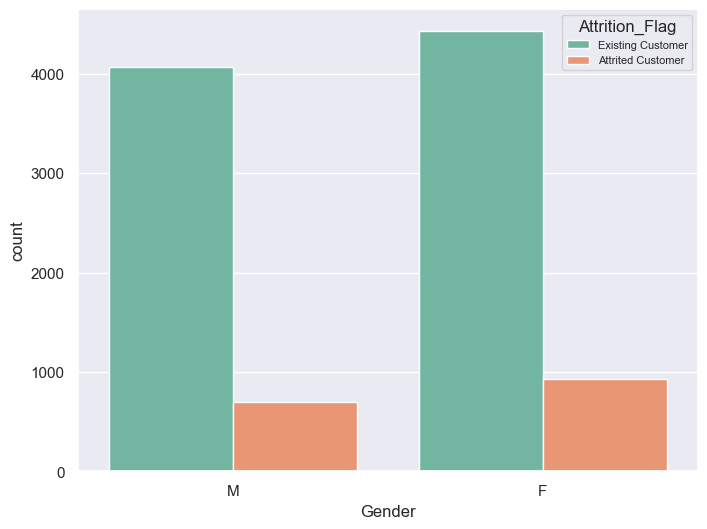

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Gender', data = df, hue = 'Attrition_Flag', palette='Set2')
plt.legend(title='Attrition_Flag', fontsize=8);

#### Gender & Marital Status

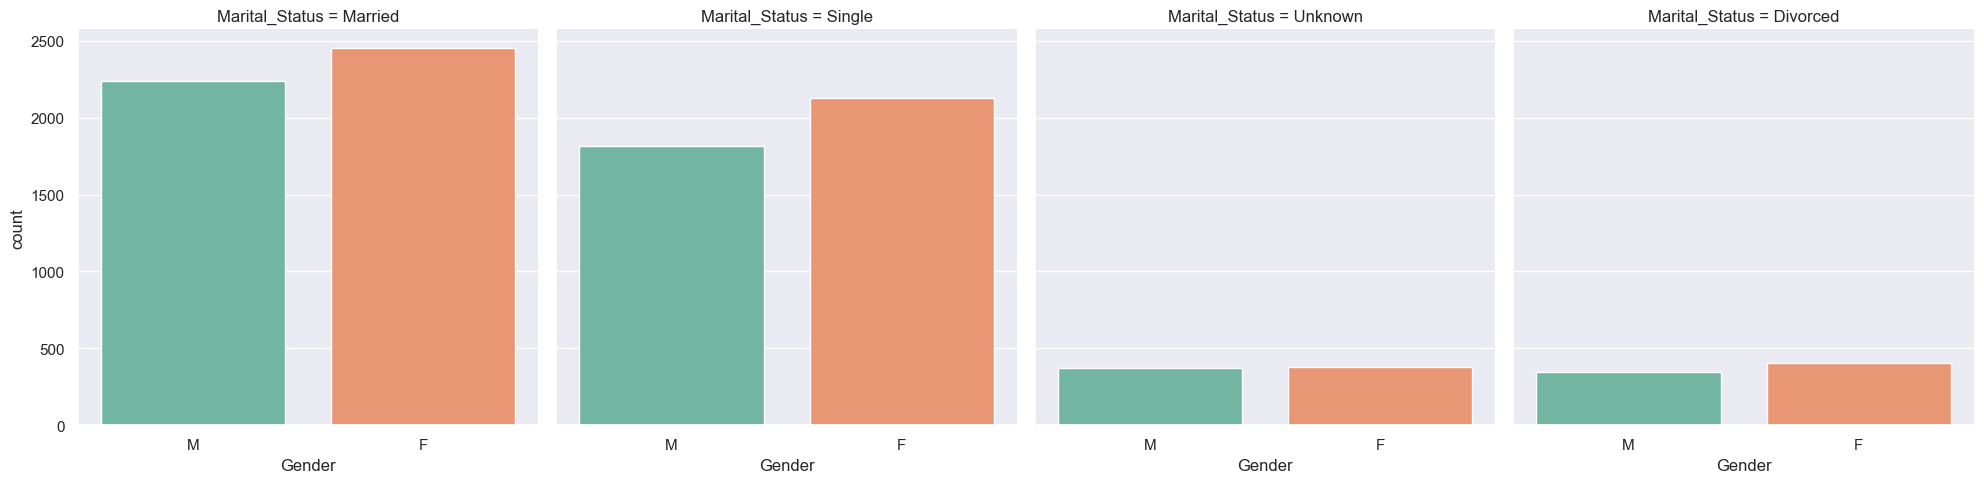

In [31]:
sns.catplot(x='Gender', data=df, palette = 'Set2', kind='count', col='Marital_Status');

#### Comparing Existing & Churned Customer's Income Level

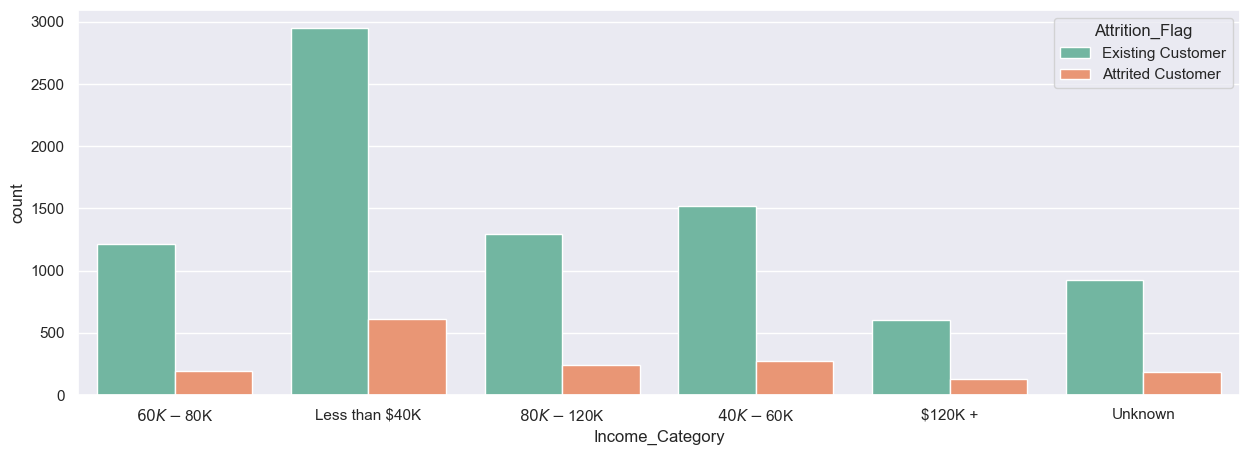

In [32]:
plt.figure(figsize = (15,5))
sns.countplot(x='Income_Category', data=df, palette = 'Set2', hue = 'Attrition_Flag');

# ref: https://seaborn.pydata.org/generated/seaborn.countplot.html

#### Comparing Gender and Income Level

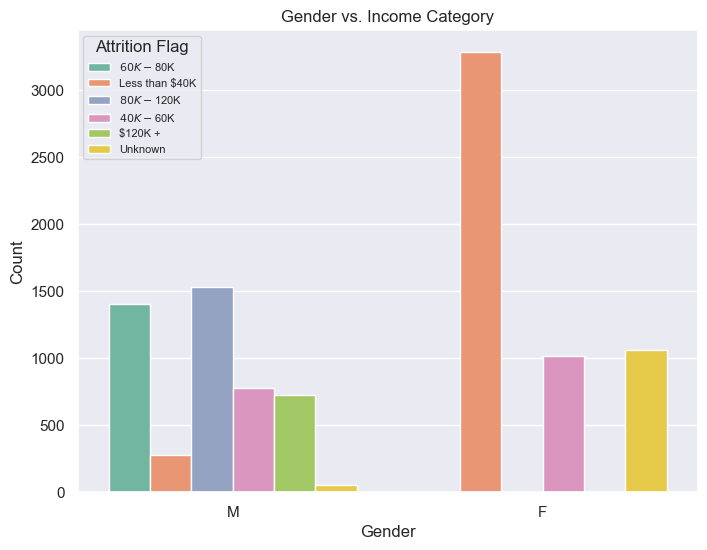

In [33]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', hue='Income_Category', data=df, palette='Set2')
plt.title("Gender vs. Income Category")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Attrition Flag', fontsize=8);

plt.show()

#### Comparing Education level of Existing or Churned Customers

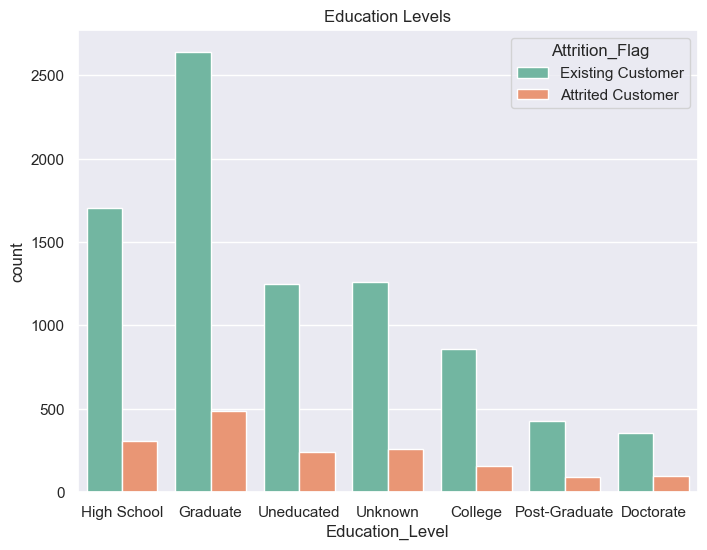

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Education_Level', data = df, hue = 'Attrition_Flag', palette = 'Set2')
plt.title('Education Levels');

#### What kind of card are customers using?

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


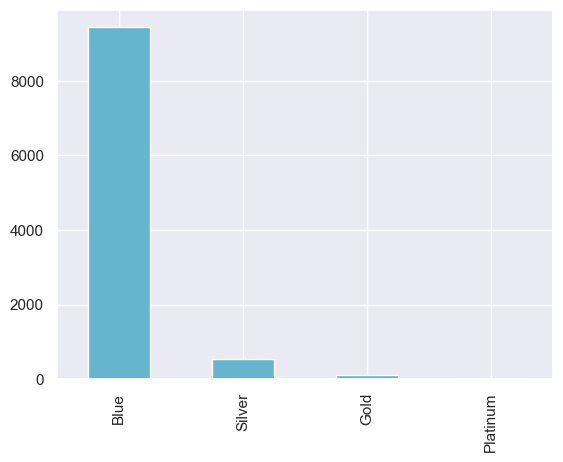

In [35]:
df.Card_Category.value_counts().plot(kind = 'bar',color = 'c');
print(df.Card_Category.value_counts())
# ref: https://www.kaggle.com/code/shawkyelgendy/credit-card-cs-eda-and-ml-100-score

#### How many months have they been cutomers?

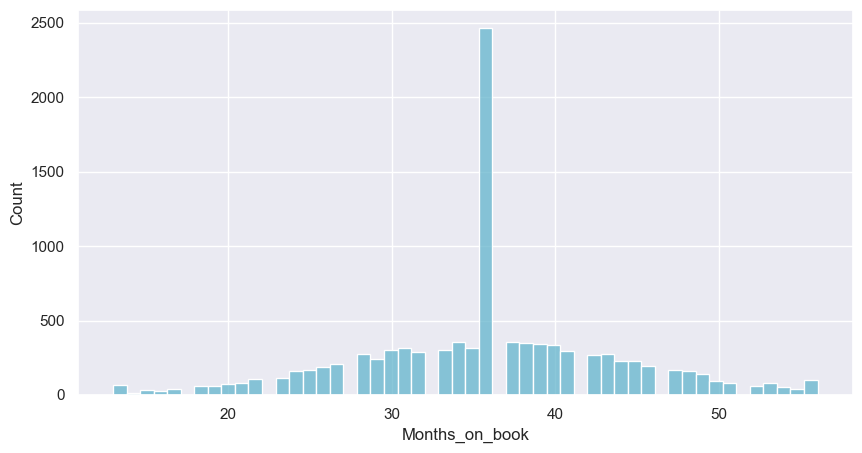

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(x='Months_on_book', data=df, color = 'c');
# Many customer's on books for 36 months. Promotion then? report comment

#### How Many Services does the Customer Use?

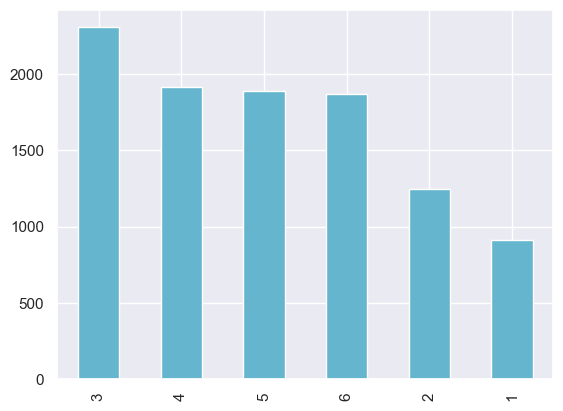

In [37]:
df.Total_Relationship_Count.value_counts().plot(kind = 'bar', color = 'c');

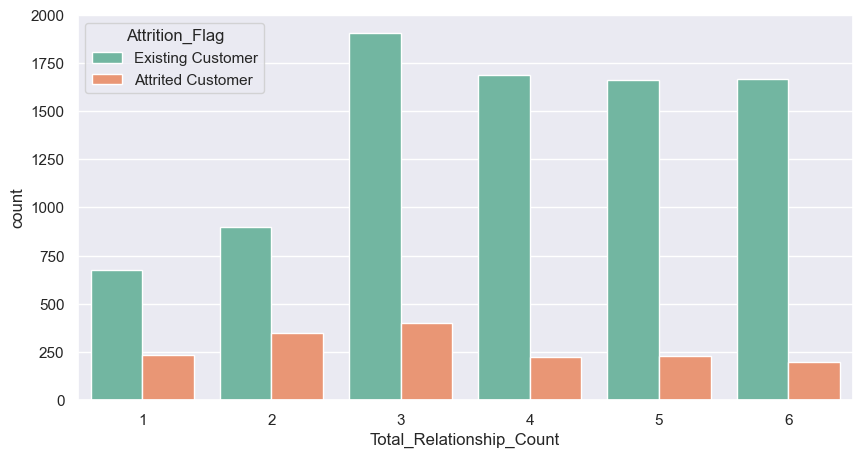

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(x='Total_Relationship_Count', data=df, palette = 'Set2', hue = 'Attrition_Flag');
# i.e. how many services they avail of with the bank. credit card = 1, credit card & checking account = 2, etc.
# Shows customer with more relationships are less likely to leave.

# Contact with Bank x Months Inactive

#### Important analysis of our two most positively correlated features with our target variable

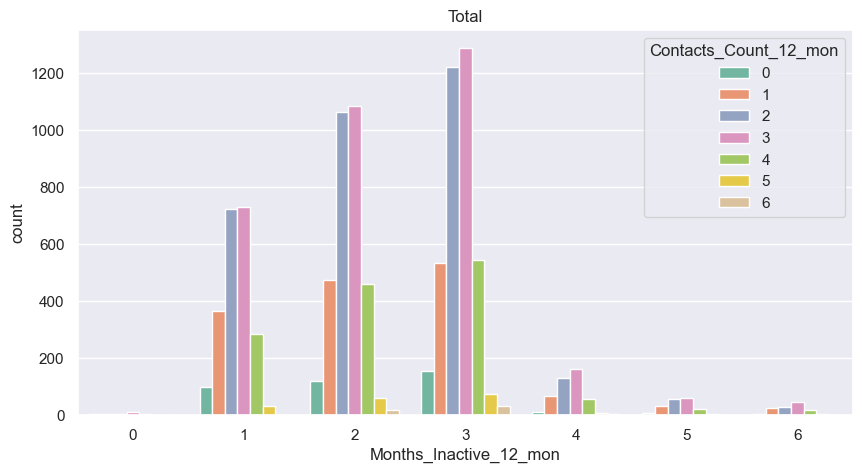

In [39]:
plt.figure(figsize = (10,5))
sns.countplot(x='Months_Inactive_12_mon', data=df, palette='Set2', hue='Contacts_Count_12_mon')
plt.title('Total');

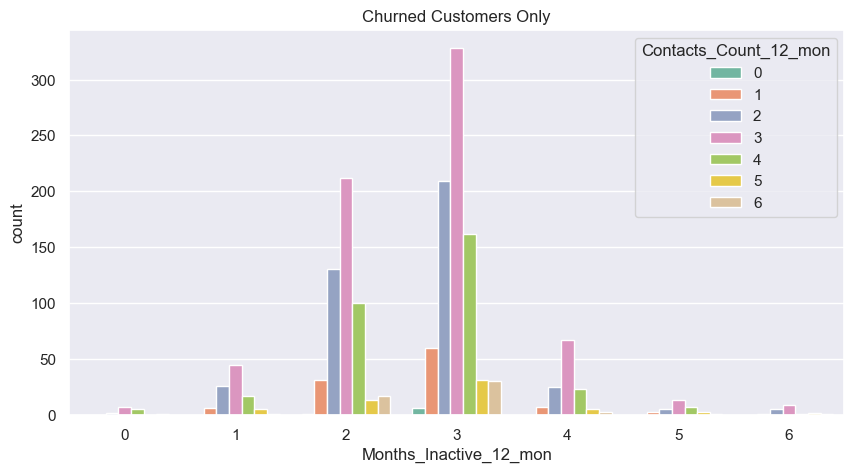

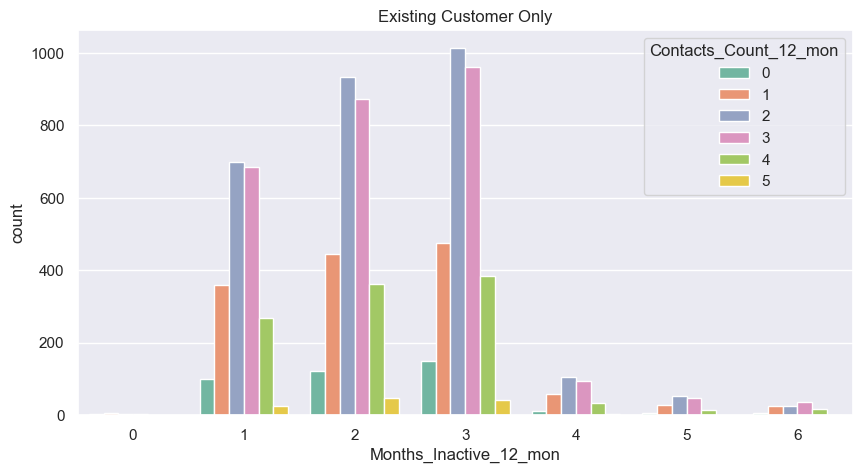

In [40]:
plt.figure(figsize = (10,5))
sns.countplot(x='Months_Inactive_12_mon', data=df_attrition, palette='Set2', hue='Contacts_Count_12_mon')
plt.title('Churned Customers Only')

plt.figure(figsize = (10,5))
sns.countplot(x='Months_Inactive_12_mon', data=df_existing, palette='Set2', hue='Contacts_Count_12_mon')
plt.title('Existing Customer Only');

#### Credit Offered to Customers

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

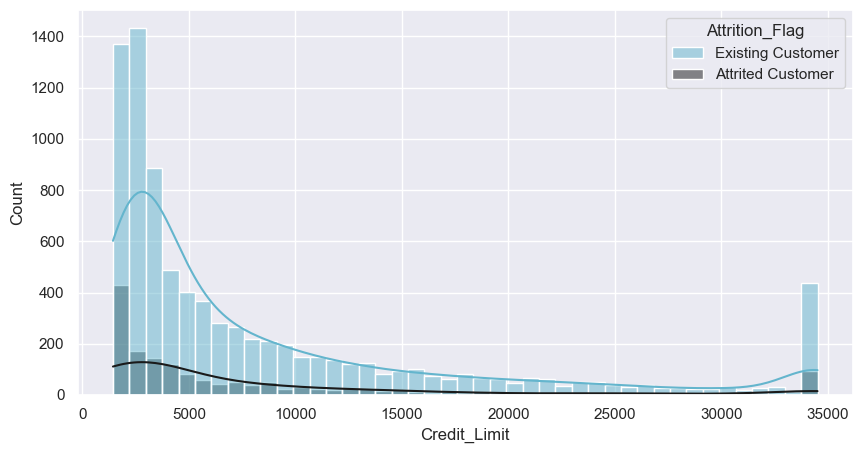

In [41]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Credit_Limit', data=df, kde=True, hue='Attrition_Flag', palette=['c', 'k'])

### Tansaction Amount x Transaction Count

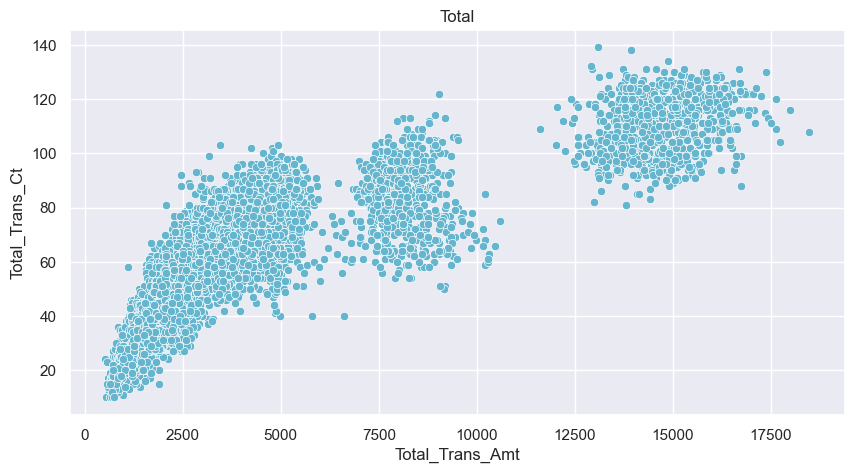

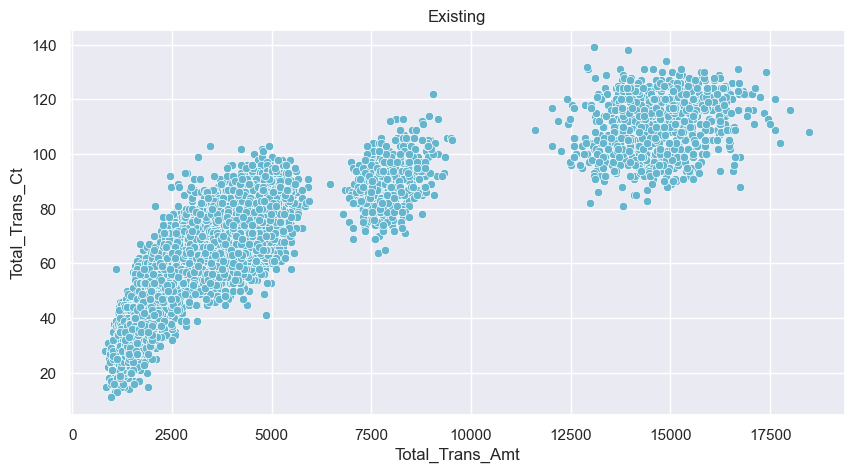

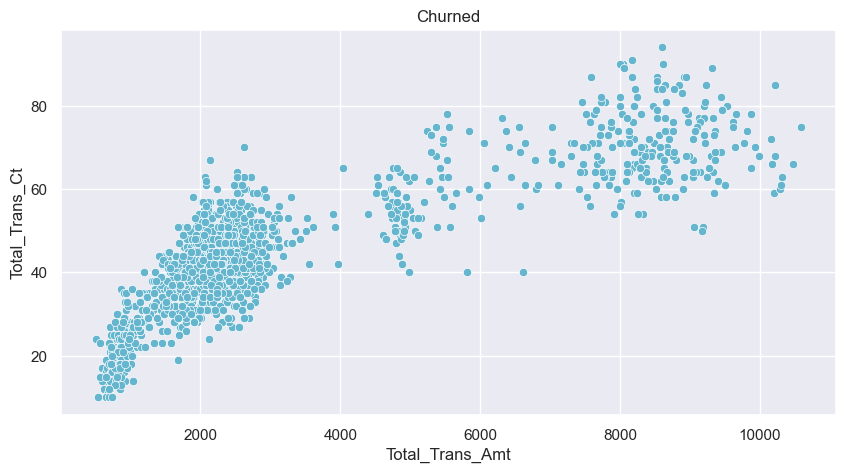

In [42]:
plt.figure(figsize = (10,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=df, color = 'c')
plt.title('Total');

plt.figure(figsize = (10,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=df_existing, color = 'c')
plt.title('Existing');

plt.figure(figsize = (10,5))
sns.scatterplot(x='Total_Trans_Amt', y='Total_Trans_Ct', data=df_attrition, color = 'c')
plt.title('Churned');

#### What Percentage of their Credit Limit are Customers Using?

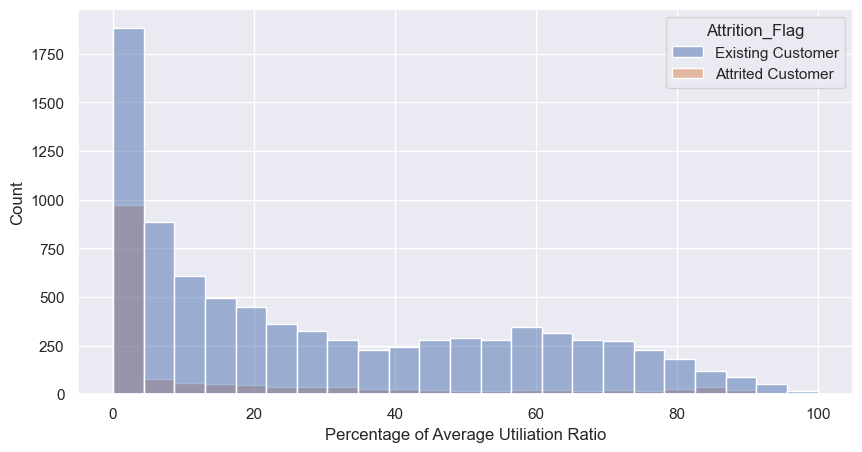

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['Avg_Utilization_Ratio']*100, data=df, hue='Attrition_Flag')
plt.xlabel('Percentage of Average Utiliation Ratio');

### Correlations of Numeric Data Pre-Encoding Using a Heatmap

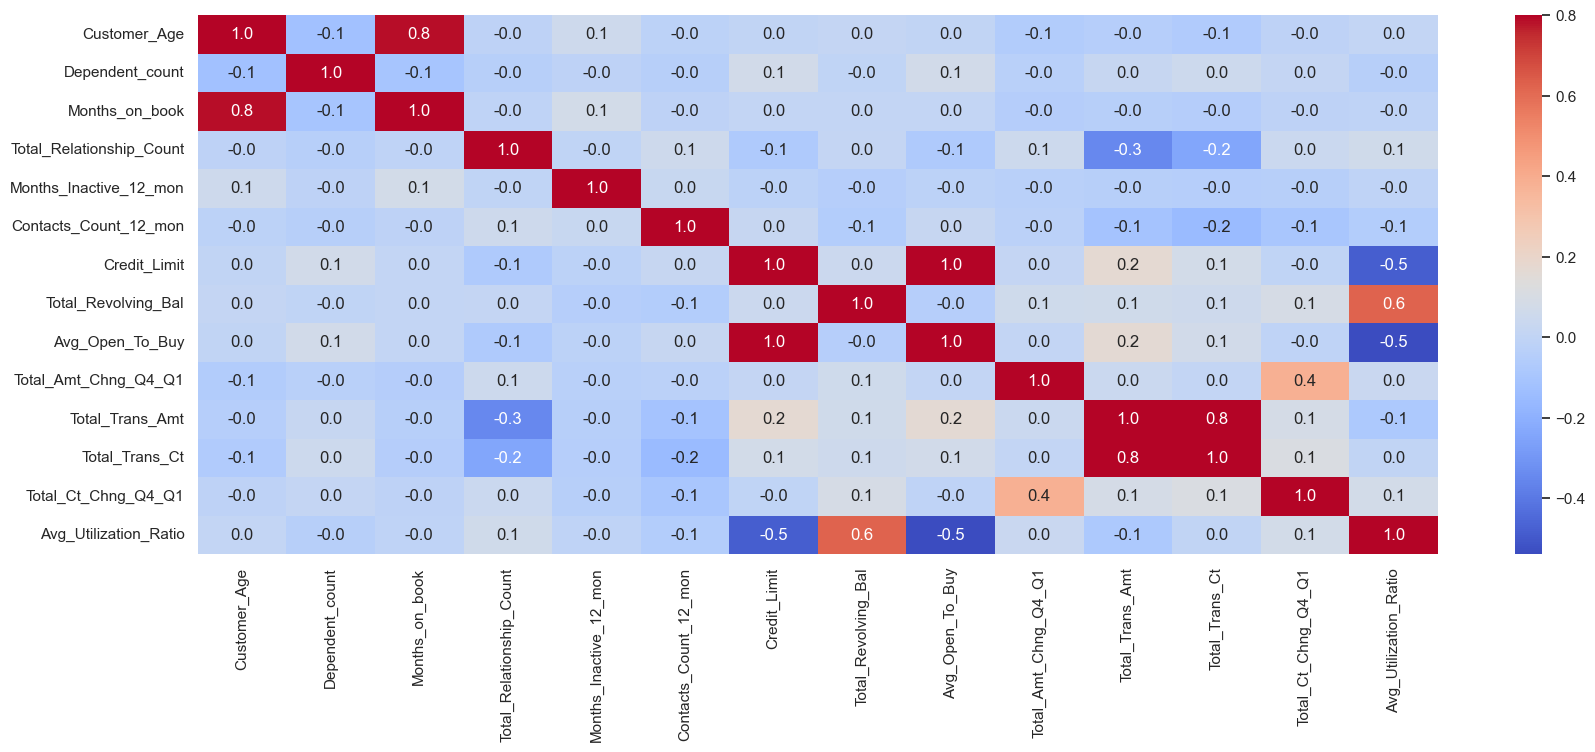

In [44]:
plt.figure(figsize=(20,7))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='coolwarm',
    annot=True,
    fmt='.1f',
    linecolor='red',
    cbar=True);
# https://www.kaggle.com/code/shawkyelgendy/credit-card-cs-eda-and-ml-100-score

# Encoding Data

##### Thus enabling us to better analyse object data

In [45]:
attrition_dict = {1: 'Existing Customer', 2: 'Attrited Customer'}

gender_dict = {1: 'M',2: 'F'}

education_dict = {1: 'High School', 
                  2: 'Graduate', 
                  3: 'Uneducated', 
                  4: 'Unknown', 
                  5: 'College', 
                  6: 'Post-Graduate', 
                  7: 'Doctorate'}

marital_dict = {1: 'Married',
                2: 'Single',
                3: 'Unknown',
                4: 'Divorced'}

income_dict = {2: 'Less than $40K',
               4: '$40K - $60K',
               1: '$60K - $80K',
               3: '$80K - $120K',
               5: '$120K +',
               6: 'Unknown'}

card_dict = {1: 'Blue',
             3: 'Silver',
             2: 'Gold',
             4: 'Platinum'}

# This is label encoding, chosen due to being easy to implement and understand results later.

In [46]:
# Encoding Categorical variables into numerical variables

# Select the categorical columns
cat_data = ['Attrition_Flag', 'Gender', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category']

# Define the encoder
encoder = ce.OrdinalEncoder(cols=cat_data, return_df=True)

# Fit and transform the encoder on the entire dataset
encoded_cat_data = encoder.fit_transform(df)

In [47]:
# Making these changes permanent
df[cat_data] = encoded_cat_data[cat_data]

# Correlations

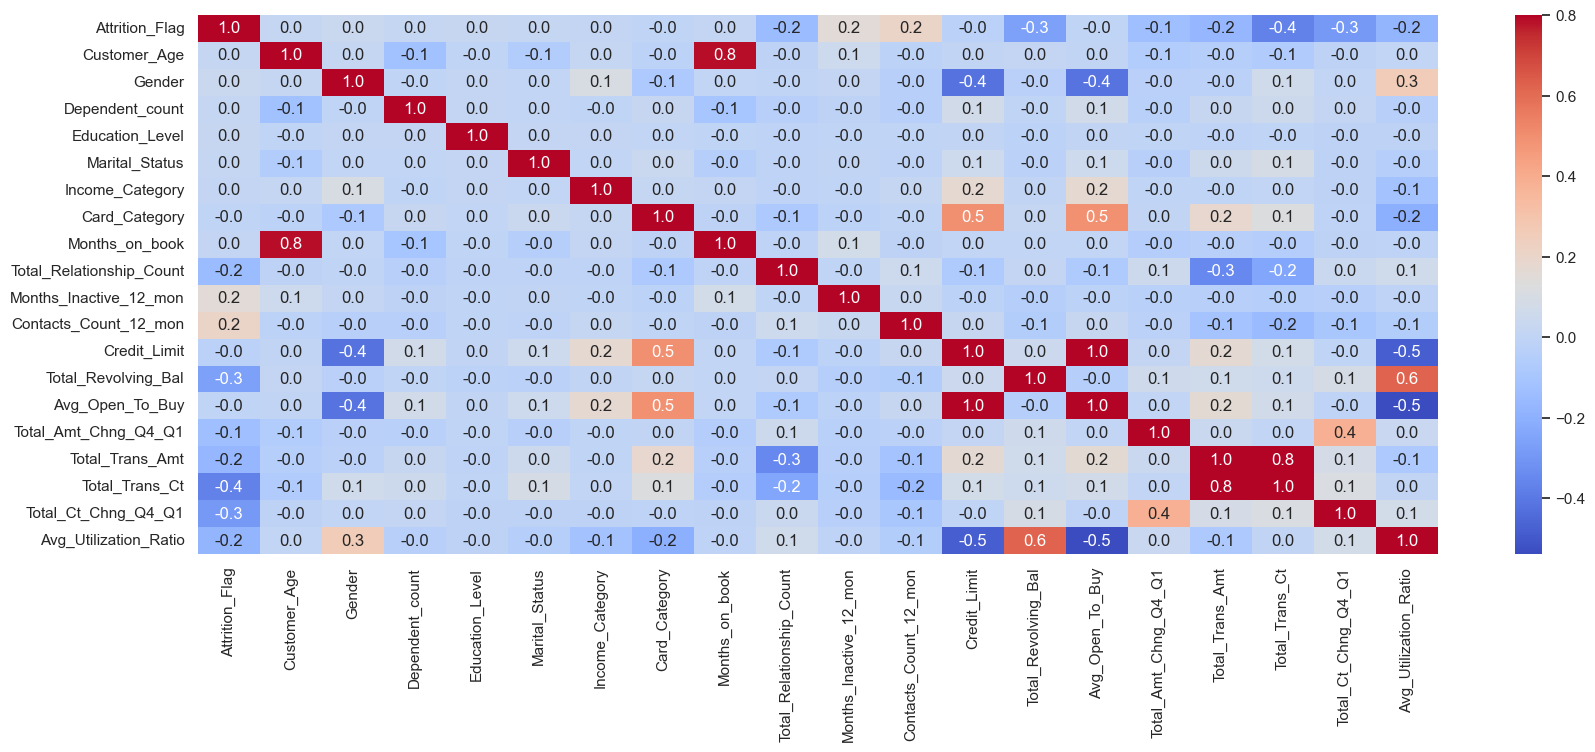

In [48]:
plt.figure(figsize=(20,7))
correlation=df.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='coolwarm',
    annot=True,
    fmt='.1f',
    linecolor='red',
    cbar=True);

In [49]:
attrition_col_corr = df.corr()

corr_dict = attrition_col_corr['Attrition_Flag'].sort_values(ascending=False).to_dict()
important_columns = []

for key, value in corr_dict.items():
    if (value > 0.2 and value < 0.9) or value <= -0.1:
        important_columns.append(key)

print("Features correlated to Attrition_Flag column:", important_columns)
# From previous project.
# Harkal, S. (2021a). Predicting a Failure in Scania Truck. [online] Medium. 
# Available at: https://sidharkal.medium.com/predicting-a-failure-in-scania-truck-8d4ecc4711a4

Features correlated to Attrition_Flag column: ['Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Relationship_Count', 'Total_Trans_Amt', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct']


### Encoding Churned Customer Dataset 
# &
### Correlation Heatmap of Churned Customers Only.

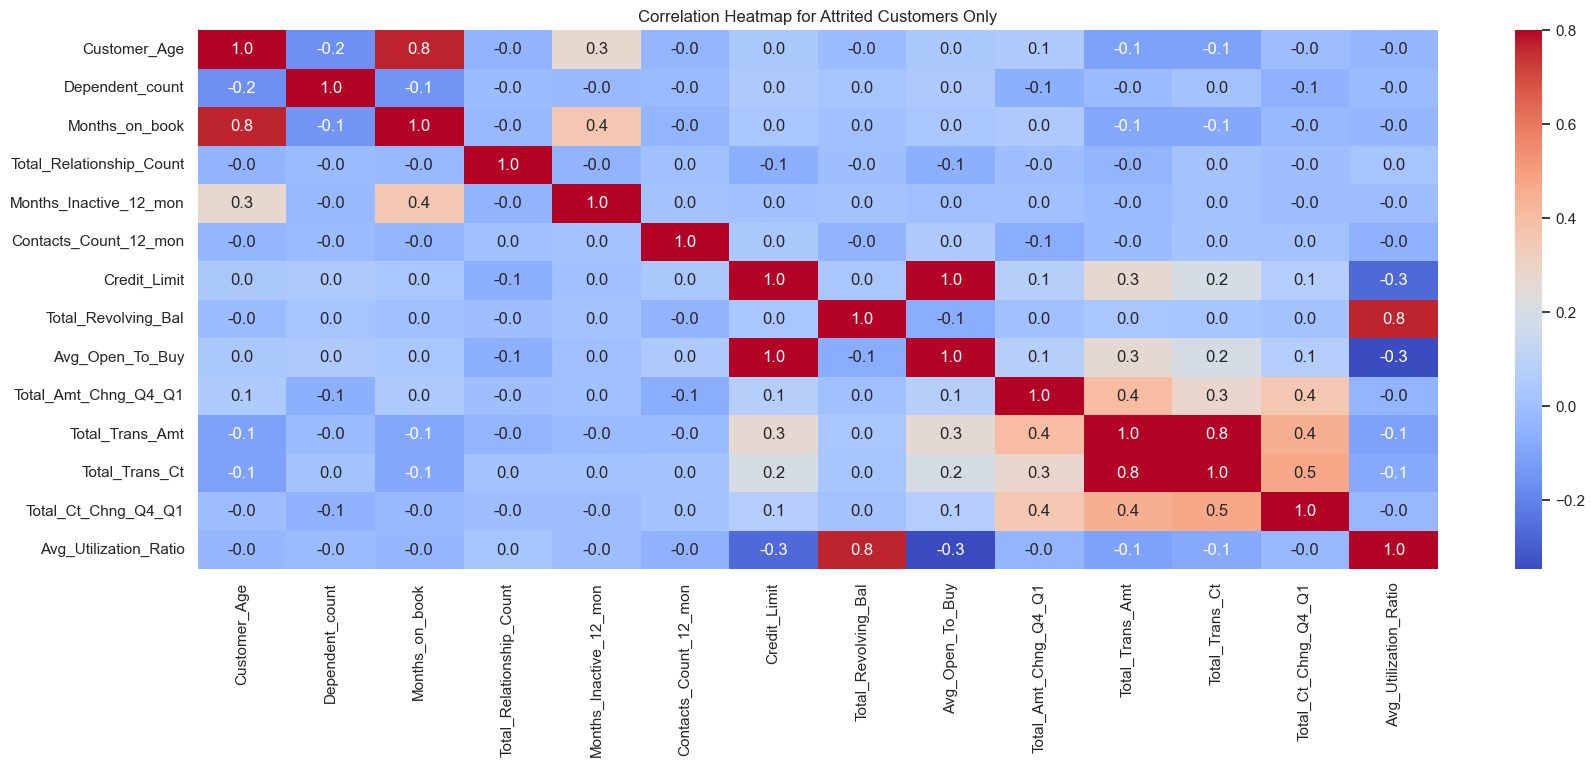

In [50]:
df_attrition_encoded = pd.get_dummies(df_attrition, drop_first=True)

correlation_attrition = df_attrition_encoded.corr()

plt.figure(figsize=(20,7))
correlation_attrition = df_attrition.corr()
sns.heatmap(correlation_attrition, vmin=None,
            vmax=0.8,
            cmap='coolwarm',
            annot=True,
            fmt='.1f',
            linecolor='red',
            cbar=True)
plt.title('Correlation Heatmap for Attrited Customers Only')
plt.show()

###### Unable to find feature correlations with only churned customers as NaN values returned.

#### At this stage we thought of using feature engineering to create new features through feature interaction in order to improve our acuracy score.

# But First: Further EDA on selected variables

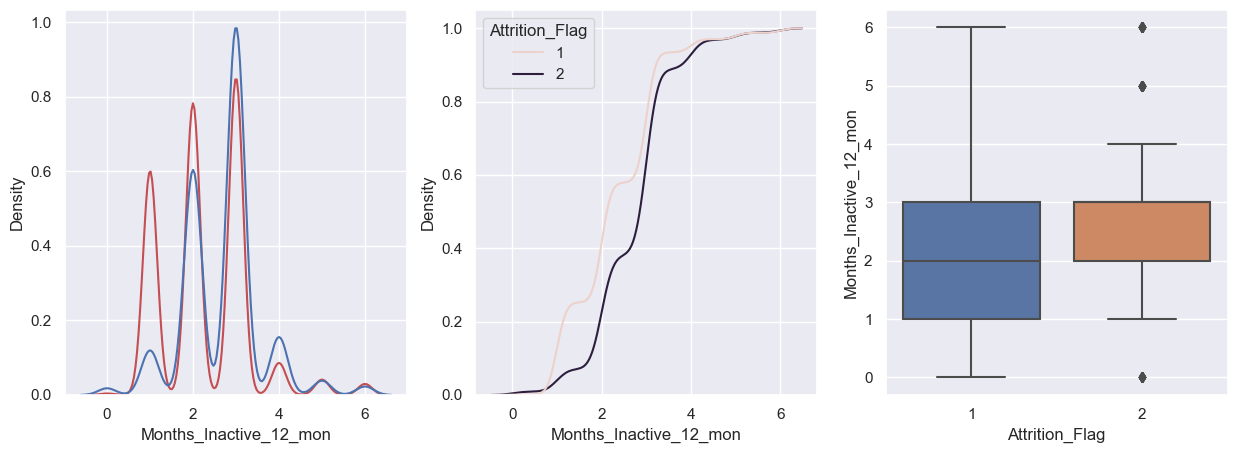

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['Attrition_Flag']==1]['Months_Inactive_12_mon'], ax=ax[0], hist=False, color='r')
sns.distplot(df[df['Attrition_Flag']==2]['Months_Inactive_12_mon'], ax=ax[0], hist=False, color='b')

sns.kdeplot(data=df, x=df['Months_Inactive_12_mon'], hue="Attrition_Flag", cumulative=True, common_norm=False, common_grid=True,ax=ax[1])


sns.boxplot(x=df['Attrition_Flag'],y=df['Months_Inactive_12_mon'],ax=ax[2])
plt.show()
# Attrited peak higher than Existing in PDF - suggests stronger correlation. ATT box plot, shows more concentrated data.

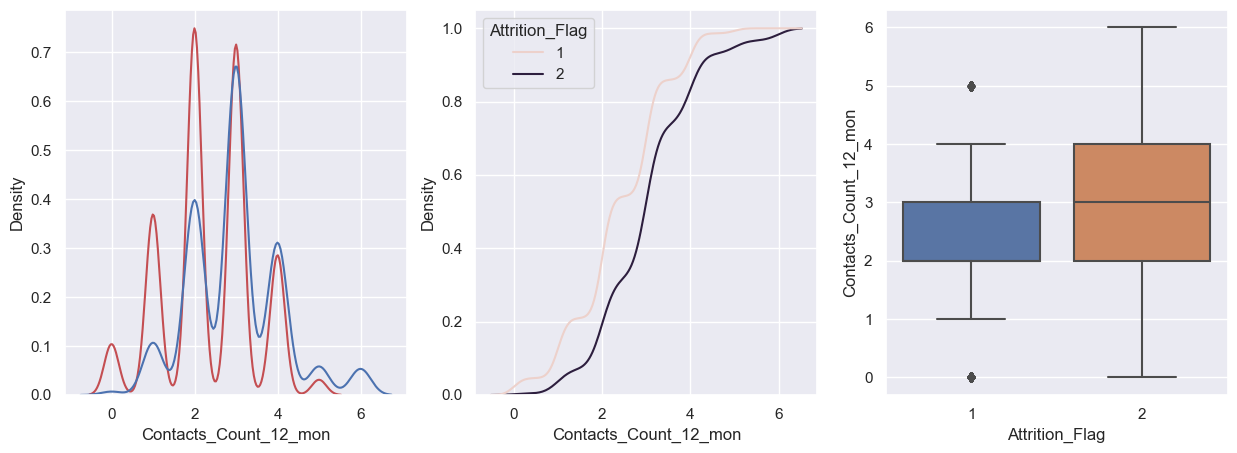

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['Attrition_Flag']==1]['Contacts_Count_12_mon'], ax=ax[0], hist=False, color='r')
sns.distplot(df[df['Attrition_Flag']==2]['Contacts_Count_12_mon'], ax=ax[0], hist=False, color='b')

sns.kdeplot(data=df, x=df['Contacts_Count_12_mon'], hue="Attrition_Flag", cumulative=True, common_norm=False, common_grid=True,ax=ax[1])

sns.boxplot(x=df['Attrition_Flag'],y=df['Contacts_Count_12_mon'],ax=ax[2])
plt.show()

# not that strong a correlation. ATTrited never over Existing peak in PDF, and box plot suggest more spread out data for Arr

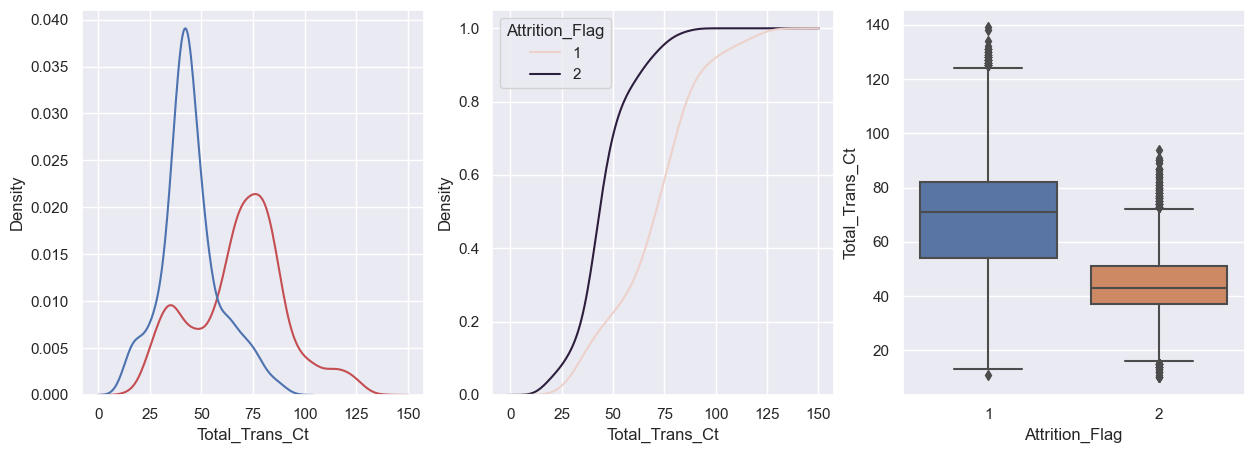

In [53]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['Attrition_Flag']==1]['Total_Trans_Ct'], ax=ax[0], hist=False, color='r')
sns.distplot(df[df['Attrition_Flag']==2]['Total_Trans_Ct'], ax=ax[0], hist=False, color='b')

sns.kdeplot(data=df, x=df['Total_Trans_Ct'], hue="Attrition_Flag", cumulative=True, common_norm=False, common_grid=True,ax=ax[1])

sns.boxplot(x=df['Attrition_Flag'],y=df['Total_Trans_Ct'],ax=ax[2])
plt.show()

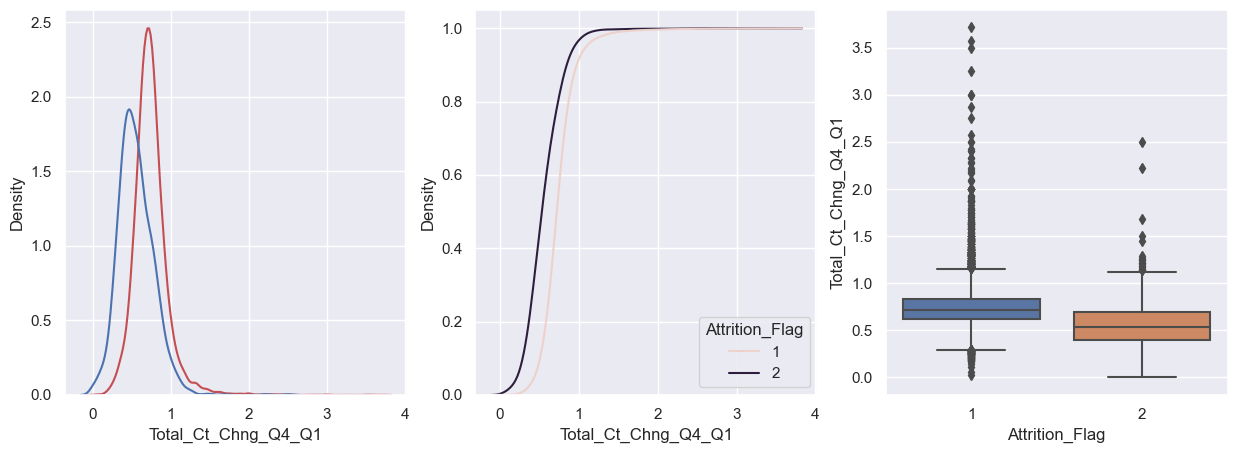

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['Attrition_Flag']==1]['Total_Ct_Chng_Q4_Q1'], ax=ax[0], hist=False, color = 'r')
sns.distplot(df[df['Attrition_Flag']==2]['Total_Ct_Chng_Q4_Q1'], ax=ax[0], hist=False, color = 'b')

sns.kdeplot(data=df, x=df['Total_Ct_Chng_Q4_Q1'], hue="Attrition_Flag", cumulative=True, common_norm=False, common_grid=True,ax=ax[1])

sns.boxplot(x=df['Attrition_Flag'],y=df['Total_Ct_Chng_Q4_Q1'],ax=ax[2])
plt.show()

# Both values are similar in below graphs suggesting not a good metric for differenciating existing & attrited customers.
### similar peaks in PDF, and trajectory in CDF
# Therefore not good at predicting churn and so will not be used in our new feature creation.

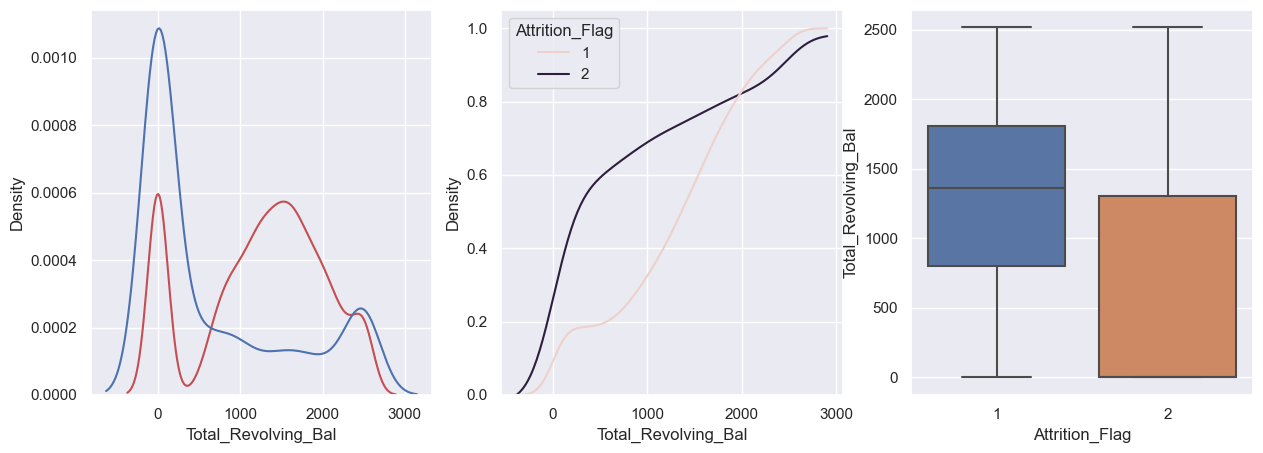

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['Attrition_Flag']==1]['Total_Revolving_Bal'], ax=ax[0], hist=False, color='r')
sns.distplot(df[df['Attrition_Flag']==2]['Total_Revolving_Bal'], ax=ax[0], hist=False, color='b')

sns.kdeplot(data=df, x=df['Total_Revolving_Bal'], hue="Attrition_Flag", cumulative=True, common_norm=False, common_grid=True,ax=ax[1])

sns.boxplot(x=df['Attrition_Flag'],y=df['Total_Revolving_Bal'],ax=ax[2])
plt.show()

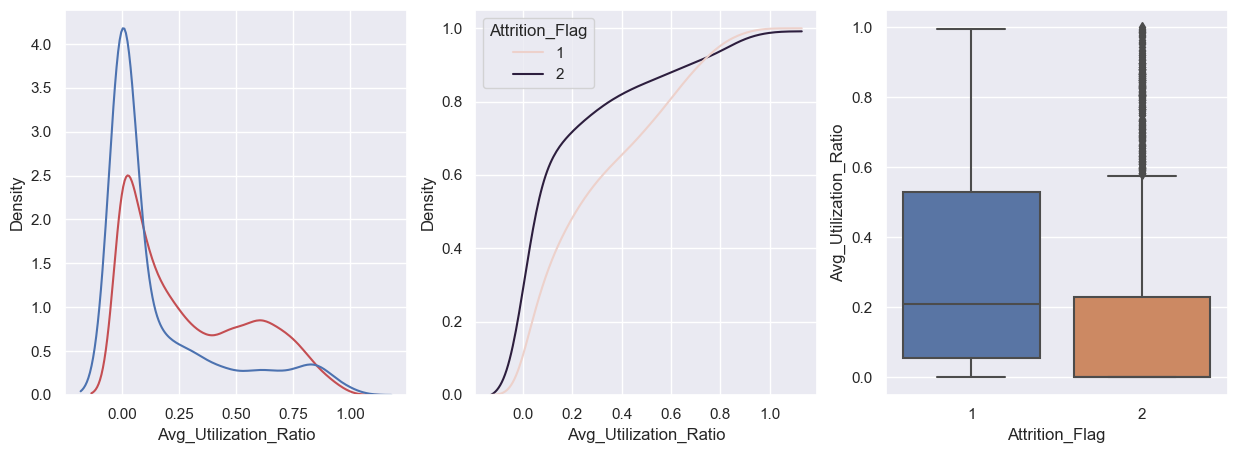

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df[df['Attrition_Flag']==1]['Avg_Utilization_Ratio'], ax=ax[0], hist=False, color='r')
sns.distplot(df[df['Attrition_Flag']==2]['Avg_Utilization_Ratio'], ax=ax[0], hist=False, color='b')

sns.kdeplot(data=df, x=df['Avg_Utilization_Ratio'], hue="Attrition_Flag", cumulative=True, common_norm=False, common_grid=True,ax=ax[1])

sns.boxplot(x=df['Attrition_Flag'],y=df['Avg_Utilization_Ratio'],ax=ax[2])
plt.show()

# Machine Learning Models

## Support Vector Machine

#####  Using the customer's banking data to predict whether a customer will churn or not given his/her banking data

#### Import relevant libraries from sklearn

In [57]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics # Import the library for accuracy, precision and recall
from sklearn import svm # Import the library for the model named as 'SVM'
from sklearn.model_selection import cross_val_score # CV
from sklearn.preprocessing import MinMaxScaler

## Splitting the Data

#### Separate the dataset into X (input features) and y (target variable):

In [58]:
# The most suitable target variable is Attrition_Flag as it represents whether a customer has churned/exited or not.
# Define X variable and Target Variable (y)
# We need to split the data into independent and dependent variable

X = df.drop(['Attrition_Flag'], axis=1) # Independent Variable
y = df['Attrition_Flag'] # Target variable of the dataset

# Display the X and y arrays
print(X, y)

       Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
0                45       1                3                1               1   
1                49       2                5                2               2   
2                51       1                3                2               1   
3                40       2                4                1               3   
4                40       1                3                3               1   
...             ...     ...              ...              ...             ...   
10122            50       1                2                2               2   
10123            41       1                2                4               4   
10124            44       2                1                1               1   
10125            30       1                2                2               3   
10126            43       2                2                2               1   

       Income_Category  Car

In [60]:
X.shape, y.shape

((10127, 19), (10127,))

#### Splitting the Data-Set into Training Set and Test Set
Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set.
Features (X): The columns that are inserted into our model will be used to make predictions.
Prediction (y): Target variable that will be predicted by the features.

-------------------------------------
Repeat this process three times with different test set sizes (10%, 20%, and 30%) and then apply cross-validation to evaluate the performance of your model on each of these training sets.

If you change the random_state = 38 in the code to random_state = 42 and 102, What changes you have observed in the acuracy, precision and recall?.

random_state simply sets a seed to the random generator, so that your train-test splits are always deterministic. If we don't set a seed, it is different each time.

## 80/20 Training/Test Split

* Splitting the data into the training set (80%) and the testing set (20%)

In [61]:
# 80% training and 20% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=102) 

In [62]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (10127, 19) (10127,)
Number of rows and columns after splitting dataset:  (8101, 19) (2026, 19) (8101,) (2026,)


### Scaling The Data

* We ensured that we scaled the data after splitting so we could scale the train & test separately, therefore preventing data leakage (Brownlee, 2016)

In [63]:
# select the continuous numerical variables
cont_variables = ['Customer_Age','Dependent_count','Months_on_book', 'Total_Relationship_Count', 
                 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# Instantiate the MinMaxScaler 
scaler = MinMaxScaler()

# Normalize the continuous numerical variables
# df[cont_variables] = scaler.fit_transform(df[cont_variables])

X_train[cont_variables] = scaler.fit_transform(X_train[cont_variables])

X_test[cont_variables] = scaler.transform(X_test[cont_variables])

In [64]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,1,1,1,1,39,5,1,3,12691.0000,777,11914.0000,1.3350,1144,42,1.6250,0.0610
1,1,49,2,5,2,2,2,1,44,6,1,2,8256.0000,864,7392.0000,1.5410,1291,33,3.7140,0.1050
2,1,51,1,3,2,1,3,1,36,4,1,0,3418.0000,0,3418.0000,2.5940,1887,20,2.3330,0.0000
3,1,40,2,4,1,3,2,1,34,3,4,1,3313.0000,2517,796.0000,1.4050,1171,20,2.3330,0.7600
4,1,40,1,3,3,1,1,1,21,5,1,0,4716.0000,0,4716.0000,2.1750,816,28,2.5000,0.0000


In [65]:
print(X_train.head())
print(X_train.describe())

      Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
6703        0.6383       1           0.4000                3               2   
3433        0.3404       1           0.6000                1               1   
8735        0.3830       1           0.4000                7               1   
3027        0.4894       2           0.2000                7               1   
6721        0.0638       2           0.2000                4               3   

      Income_Category  Card_Category  Months_on_book  \
6703                3              1          0.8372   
3433                3              1          0.5349   
8735                3              1          0.5814   
3027                6              1          0.5349   
6721                6              1          0.5349   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6703                    0.8000                  0.5000                 0.3333   
3433                

In [65]:
print(X_test.head())
print(X_test.describe())

       Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
10036        0.6596       1           0.4000                3               2   
2031         0.1702       2           0.2000                5               1   
7693         0.3191       1           0.6000                4               3   
169          0.5745       1           0.6000                1               1   
6107         0.4681       2           0.4000                2               1   

       Income_Category  Card_Category  Months_on_book  \
10036                5              1          0.7674   
2031                 2              1          0.3953   
7693                 1              1          0.5349   
169                  1              1          0.7907   
6107                 2              1          0.5581   

       Total_Relationship_Count  Months_Inactive_12_mon  \
10036                    0.4000                  0.3333   
2031                     0.4000                  0.5

In [66]:
# We've taken all the data points and put them between 0 and 1
# We transform the data but structurally we have not changed it
# These data transformation (normalization) help our ML model in your predictions
# How we transform the data to assit our ML model - garbage in, garbage out - We try to make our data a bit better

# min         0.0000
# max         1.0000

### 80/20 SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [75]:
print('Class distribution before SMOTE: \n', pd.Series(y_train).value_counts())
print('\nClass distribution after SMOTE: \n', pd.Series(y_train_res).value_counts())

Class distribution before SMOTE: 
 1    7629
2    1485
Name: Attrition_Flag, dtype: int64

Class distribution after SMOTE: 
 1    7629
2    7629
Name: Attrition_Flag, dtype: int64


In [76]:
# Train an SVM model on the resampled training data
model = SVC()
model.fit(X_train_res, y_train_res)

SVC()

In [77]:
# Create a classifier
cls_svm = svm.SVC(kernel="linear")

# Train the model
cls_svm.fit(X_train, y_train)

# Predict the response
y_pred = cls_svm.predict(X_test)

In [78]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on testing data:', accuracy)

Accuracy on testing data: 0.8657453109575518


## Accuracy, score and recall based on SVM on balanced dataset

In [72]:
# metrics
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred), "\n")
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision {:.4f}'.format(metrics.precision_score(y_test, y_pred)))
print('Sensitivity/Recall {:.4f}'.format(metrics.recall_score(y_test, y_pred)))

Confusion Matrix
 [[1482  248]
 [  43  253]] 

Accuracy 0.8564
Precision 0.9718
Sensitivity/Recall 0.8566


## Use of Cross Validation
* Training set 80%

In [73]:
# Create an initialise SVM classifier
svm_classifier = SVC(kernel='linear')

# Calculate the score using cross validation method
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean: 0.9036
STD: 0.0047


### Confusion Matrix on Imbalanced dataset

There are 2026 customers in our test set (20%).

True positives(TP): There are 1683 clients who churned, and the model predicted positive as churned.
True negatives(TN): There are 174 clients who did not churn, and the model predicted negative as not churned.
False positives(FP): There are 122 clients who did not churn, but the model predicted positive as churned.
False negatives(FN): There are 47 clients who churned, but the model predicted negative as not churned.


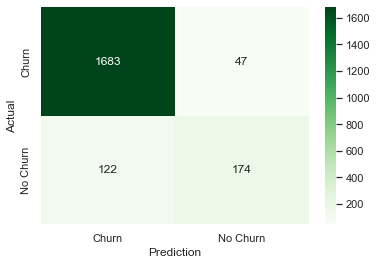

In [74]:
# Call a method predict by using an object classifier 'cls_svm'
y_predict = cls_svm.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
ax = sns.heatmap(cm, annot = True, fmt='.0f', xticklabels=['Churn', 'No Churn'],
                                         yticklabels=['Churn', 'No Churn'],
                                         cmap='Greens')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

print('There are 2026 customers in our test set (20%).')
print('\nTrue positives(TP): There are 1683 clients who churned, and the model predicted positive as churned.')
print('True negatives(TN): There are 174 clients who did not churn, and the model predicted negative as not churned.')
print('False positives(FP): There are 122 clients who did not churn, but the model predicted positive as churned.')
print('False negatives(FN): There are 47 clients who churned, but the model predicted negative as not churned.')

## Use of Cross Validation - Performance on the entire dataset
* X = Continuous Variables of the dataset
* y = Target variable of the dataset

#### We had great difficulty trying to run the #'ed out code below. 
### As the computation cost was too high, we found a more efficient kernel (RBF).
#### The RBF kernel is more flexible and we ensured we cross-validated to avoid over-fitting (Sunil, 2017)

In [75]:
# svm_classifier = SVC(kernel='linear')

# scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')

# print('CV Mean Accuracy: {:.4f}'.format(np.mean(scores)))
# print('STD: {:.4f}'.format(np.std(scores)))

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create and initialize SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')

# Calculate the score using cross-validation method
scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')

print('CV Mean Accuracy: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean Accuracy: 0.8413
STD: 0.0038


# 90/10 Training/Test Split

In [70]:
# 90% training and 10% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=102)

In [71]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (10127, 19) (10127,)
Number of rows and columns after splitting dataset:  (9114, 19) (1013, 19) (9114,) (1013,)


### Scaling 90/10 data

In [72]:
cont_variables = ['Customer_Age','Dependent_count','Months_on_book', 'Total_Relationship_Count', 
                 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train[cont_variables] = scaler.fit_transform(X_train[cont_variables])

X_test[cont_variables] = scaler.transform(X_test[cont_variables])

### 90/10 SMOTE

In [79]:
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [81]:
print('Class distribution before SMOTE: \n', pd.Series(y_train).value_counts())
print('\nClass distribution after SMOTE: \n', pd.Series(y_train_res).value_counts())

Class distribution before SMOTE: 
 1    7629
2    1485
Name: Attrition_Flag, dtype: int64

Class distribution after SMOTE: 
 1    7629
2    7629
Name: Attrition_Flag, dtype: int64


In [82]:
# Train an SVM model on the resampled training data
model = SVC()
model.fit(X_train_res, y_train_res)

SVC()

In [68]:
# Create a classifier
cls_svm = svm.SVC(kernel="linear")

# Train the model
cls_svm.fit(X_train, y_train)

# Predict the response
y_pred = cls_svm.predict(X_test)

In [84]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on testing data:', accuracy)

Accuracy on testing data: 0.8756169792694966


## Accuracy, score and recall based on SVM on balanced dataset

In [85]:
# metrics
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred), "\n")
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision {:.4f}'.format(metrics.precision_score(y_test, y_pred)))
print('Sensitivity/Recall {:.4f}'.format(metrics.recall_score(y_test, y_pred)))

Confusion Matrix
 [[761 110]
 [ 16 126]] 

Accuracy 0.8756
Precision 0.9794
Sensitivity/Recall 0.8737


### Confusion Matrix on Imbalanced dataset

There are 1013 customers in our test set (10%).

True positives(TP): There are 849 clients who churned, and the model predicted positive as churned.
True negatives(TN): There are 85 clients who did not churn, and the model predicted negative as not churned.
False positives(FP): There are 57 clients who did not churn, but the model predicted positive as churned.
False negatives(FN): There are 22 clients who churned, but the model predicted negative as not churned.


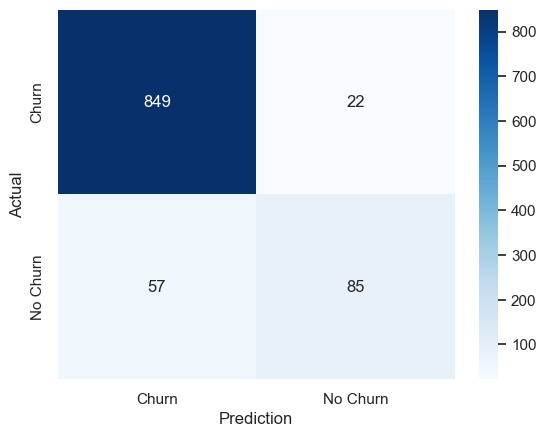

In [80]:
# Call a method predict by using an object classifier 'cls_svm'
y_predict = cls_svm.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
ax = sns.heatmap(cm, annot = True, fmt='.0f', xticklabels=['Churn', 'No Churn'],
                                         yticklabels=['Churn', 'No Churn'],
                                         cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

print('There are 1013 customers in our test set (10%).')
print('\nTrue positives(TP): There are 849 clients who churned, and the model predicted positive as churned.')
print('True negatives(TN): There are 85 clients who did not churn, and the model predicted negative as not churned.')
print('False positives(FP): There are 57 clients who did not churn, but the model predicted positive as churned.')
print('False negatives(FN): There are 22 clients who churned, but the model predicted negative as not churned.')

## Use of Cross Validation
* Training set 90%

In [87]:
# Create an initialise SVM classifier
svm_classifier = SVC(kernel='linear')

# Calculate the score using cross validation method
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean Accuracy: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean Accuracy: 0.9041
STD: 0.0056


# 70/30 Training/Test Split

In [83]:
# 70% training and 30% test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=109)

In [84]:
# Display the rows and columns (dimensions) of an unsplitted dataset
print('Total number of rows and columns for the complete dataset: ', X.shape, y.shape)

# Display the rows and columns (dimensions) of the splitted dataset
print('Number of rows and columns after splitting dataset: ', X_train.shape, X_test.shape, y_train.shape, y_test.shape )

Total number of rows and columns for the complete dataset:  (10127, 19) (10127,)
Number of rows and columns after splitting dataset:  (7088, 19) (3039, 19) (7088,) (3039,)


### Scaling 70/30 data

In [85]:
cont_variables = ['Customer_Age','Dependent_count','Months_on_book', 'Total_Relationship_Count', 
                 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
                 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train[cont_variables] = scaler.fit_transform(X_train[cont_variables])

X_test[cont_variables] = scaler.transform(X_test[cont_variables])

### 70/30 SMOTE

In [86]:
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [87]:
print('Class distribution before SMOTE: \n', pd.Series(y_train).value_counts())
print('\nClass distribution after SMOTE: \n', pd.Series(y_train_res).value_counts())

Class distribution before SMOTE: 
 1    5927
2    1161
Name: Attrition_Flag, dtype: int64

Class distribution after SMOTE: 
 1    5927
2    5927
Name: Attrition_Flag, dtype: int64


In [93]:
# Train an SVM model on the resampled training data
model = SVC()
model.fit(X_train_res, y_train_res)

SVC()

In [94]:
# Create a classifier
#cls_svm = svm.SVC(kernel="linear")

# Train the model
#cls_svm.fit(X_train, y_train)

# Predict the response
#y_pred = cls_svm.predict(X_test)

##### Very interestingly, the code above was too heavy on computational cost, and so Jupyter notebook was automatically skipping this step.

In [95]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing data:", accuracy)

Accuracy on testing data: 0.8565317538664035


## Accuracy, score and recall based on SVM on balanced dataset

In [96]:
# metrics
print('Confusion Matrix\n',metrics.confusion_matrix(y_test, y_pred), "\n")
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision {:.4f}'.format(metrics.precision_score(y_test, y_pred)))
print('Sensitivity/Recall {:.4f}'.format(metrics.recall_score(y_test, y_pred)))

Confusion Matrix
 [[2218  355]
 [  81  385]] 

Accuracy 0.8565
Precision 0.9648
Sensitivity/Recall 0.8620


### Confusion Matrix on Imbalanced dataset

There are 3039 customers in our test set (30%).

True positives(TP): There are 2510 clients who churned, and the model predicted positive as churned.
True negatives(TN): There are 253 clients who did not churn, and the model predicted negative as not churned.
False positives(FP): There are 213 clients who did not churn, but the model predicted positive as churned.
False negatives(FN): There are 63 clients who churned, but the model predicted negative as not churned.


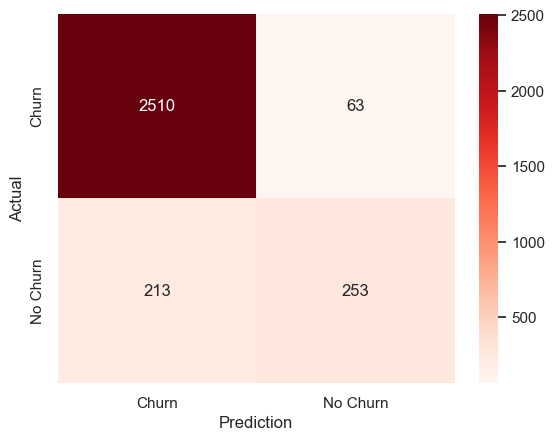

In [88]:
# Call a method predict by using an object classifier 'cls_svm'
y_predict = cls_svm.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
ax = sns.heatmap(cm, annot = True, fmt='.0f', xticklabels=['Churn', 'No Churn'],
                                         yticklabels=['Churn', 'No Churn'],
                                         cmap='Reds')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

print('There are 3039 customers in our test set (30%).')
print('\nTrue positives(TP): There are 2510 clients who churned, and the model predicted positive as churned.')
print('True negatives(TN): There are 253 clients who did not churn, and the model predicted negative as not churned.')
print('False positives(FP): There are 213 clients who did not churn, but the model predicted positive as churned.')
print('False negatives(FN): There are 63 clients who churned, but the model predicted negative as not churned.')

## Use of Cross Validation
* Training set 70%

In [98]:
# Create an initialise SVM classifier
svm_classifier = SVC(kernel='linear')

# Calculate the score using cross validation method
scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))


CV Mean: 0.9032
STD: 0.0072


In [99]:
from sklearn.model_selection import cross_val_score

# Create an SVM classifier
cls_svm = svm.SVC(kernel="linear")

# Calculate the score using cross-validation method
scores = cross_val_score(cls_svm, X_train, y_train, cv=5, scoring='accuracy')

print('CV Mean: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean: 0.9032
STD: 0.0072


#### Code above was also coputationally costly, to increase efficient we dropped the number of folds from 20 to five.

# Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

## Grid Search to Find Optimal Hyperparameters (KERNEL='RBF')

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time).

In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................................C=1, gamma=0.01; total time=   1.0s
[CV] END ....................................C=1, gamma=0.01; total time=   1.1s
[CV] END ....................................C=1, gamma=0.01; total time=   1.1s
[CV] END ....................................C=1, gamma=0.01; total time=   1.1s
[CV] END ....................................C=1, gamma=0.01; total time=   1.1s
[CV] END ...................................C=1, gamma=0.001; total time=   1.0s
[CV] END ...................................C=1, gamma=0.001; total time=   1.0s
[CV] END ...................................C=1, gamma=0.001; total time=   1.0s
[CV] END ...................................C=1, gamma=0.001; total time=   1.0s
[CV] END ...................................C=1, gamma=0.001; total time=   1.0s
[CV] END ..................................C=1, gamma=0.0001; total time=   1.0s
[CV] END ..................................C=1, 

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [101]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.8124,0.0426,0.3636,0.0186,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.8286,0.8336,0.8406,...,0.8362,0.0057,7,0.8381,0.8369,0.8351,0.8369,0.8341,0.8362,0.0014
1,0.7181,0.0426,0.3827,0.0340,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.8286,0.8336,0.8406,...,0.8362,0.0057,7,0.8381,0.8369,0.8351,0.8369,0.8341,0.8362,0.0014
2,0.6900,0.0244,0.3528,0.0223,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.8286,0.8336,0.8406,...,0.8362,0.0057,7,0.8381,0.8369,0.8351,0.8369,0.8341,0.8362,0.0014
3,0.7368,0.0751,0.3268,0.0261,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.8914,0.9048,0.9069,...,0.9008,0.0064,6,0.9056,0.8984,0.9021,0.9039,0.9021,0.9024,0.0024
4,0.7616,0.0457,0.3640,0.0242,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.8286,0.8336,0.8406,...,0.8362,0.0057,7,0.8381,0.8369,0.8351,0.8369,0.8341,0.8362,0.0014
5,0.7131,0.0310,0.3521,0.0269,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.8286,0.8336,0.8406,...,0.8362,0.0057,7,0.8381,0.8369,0.8351,0.8369,0.8341,0.8362,0.0014
6,0.7141,0.0155,0.2708,0.0277,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.8956,0.9168,0.9140,...,0.9086,0.0073,2,0.9173,0.9122,0.9129,0.9141,0.9166,0.9146,0.0020
7,0.6752,0.0135,0.3027,0.0067,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.8907,0.9048,0.9048,...,0.9012,0.0071,5,0.9035,0.8996,0.9000,0.9005,0.9000,0.9007,0.0014
8,0.7050,0.0231,0.4030,0.1272,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.8286,0.8336,0.8406,...,0.8362,0.0057,7,0.8381,0.8369,0.8351,0.8369,0.8341,0.8362,0.0014
9,1.3986,0.0190,0.2191,0.0084,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.9111,0.9245,0.9252,...,0.9183,0.0057,1,0.9330,0.9305,0.9309,0.9314,0.9318,0.9315,0.0009


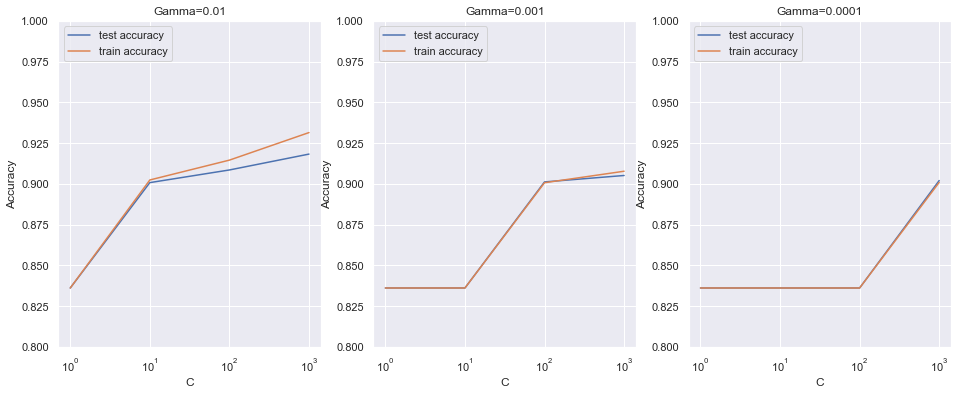

In [102]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [103]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0:.4f} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9183 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [104]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision {:.4}'.format(metrics.precision_score(y_test, y_pred)))
print('Sensitivity/Recall {:.4}'.format(metrics.recall_score(y_test, y_pred)))

[[2573    0]
 [ 461    5]] 

Accuracy 0.8483
Precision 0.8481
Sensitivity/Recall 1.0


## Grid Search to Find Optimal Hyperparameters (KERNEL='LINEAR')

Let's first use the LINEAL kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time).

In [105]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="linear")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................................C=1, gamma=0.01; total time=   0.5s
[CV] END ....................................C=1, gamma=0.01; total time=   0.5s
[CV] END ....................................C=1, gamma=0.01; total time=   0.6s
[CV] END ....................................C=1, gamma=0.01; total time=   0.5s
[CV] END ....................................C=1, gamma=0.01; total time=   0.5s
[CV] END ...................................C=1, gamma=0.001; total time=   0.5s
[CV] END ...................................C=1, gamma=0.001; total time=   0.5s
[CV] END ...................................C=1, gamma=0.001; total time=   0.5s
[CV] END ...................................C=1, gamma=0.001; total time=   0.5s
[CV] END ...................................C=1, gamma=0.001; total time=   0.5s
[CV] END ..................................C=1, gamma=0.0001; total time=   0.5s
[CV] END ..................................C=1, 

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(kernel='linear'),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [106]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.5193,0.0126,0.0821,0.0323,1,0.0100,"{'C': 1, 'gamma': 0.01}",0.8921,0.9090,0.9090,...,0.9031,0.0085,7,0.9067,0.9026,0.9032,0.9065,0.9027,0.9043,0.0019
1,0.5182,0.0068,0.0668,0.0027,1,0.0010,"{'C': 1, 'gamma': 0.001}",0.8921,0.9090,0.9090,...,0.9031,0.0085,7,0.9067,0.9026,0.9032,0.9065,0.9027,0.9043,0.0019
2,0.5133,0.0041,0.0710,0.0052,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.8921,0.9090,0.9090,...,0.9031,0.0085,7,0.9067,0.9026,0.9032,0.9065,0.9027,0.9043,0.0019
3,1.0441,0.0350,0.0680,0.0074,10,0.0100,"{'C': 10, 'gamma': 0.01}",0.8921,0.9133,0.9076,...,0.9032,0.0078,4,0.9056,0.9026,0.9039,0.9048,0.9046,0.9043,0.0010
4,1.0225,0.0370,0.0617,0.0005,10,0.0010,"{'C': 10, 'gamma': 0.001}",0.8921,0.9133,0.9076,...,0.9032,0.0078,4,0.9056,0.9026,0.9039,0.9048,0.9046,0.9043,0.0010
5,1.0347,0.0331,0.0634,0.0043,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.8921,0.9133,0.9076,...,0.9032,0.0078,4,0.9056,0.9026,0.9039,0.9048,0.9046,0.9043,0.0010
6,4.7484,0.2300,0.0660,0.0070,100,0.0100,"{'C': 100, 'gamma': 0.01}",0.8907,0.9133,0.9069,...,0.9027,0.0083,10,0.9055,0.9026,0.9034,0.9048,0.9048,0.9042,0.0010
7,4.7212,0.1955,0.0613,0.0008,100,0.0010,"{'C': 100, 'gamma': 0.001}",0.8907,0.9133,0.9069,...,0.9027,0.0083,10,0.9055,0.9026,0.9034,0.9048,0.9048,0.9042,0.0010
8,4.8847,0.1565,0.0688,0.0146,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.8907,0.9133,0.9069,...,0.9027,0.0083,10,0.9055,0.9026,0.9034,0.9048,0.9048,0.9042,0.0010
9,35.0775,1.3865,0.0620,0.0029,1000,0.0100,"{'C': 1000, 'gamma': 0.01}",0.8928,0.9147,0.9069,...,0.9036,0.0078,1,0.9062,0.9030,0.9037,0.9044,0.9046,0.9044,0.0011


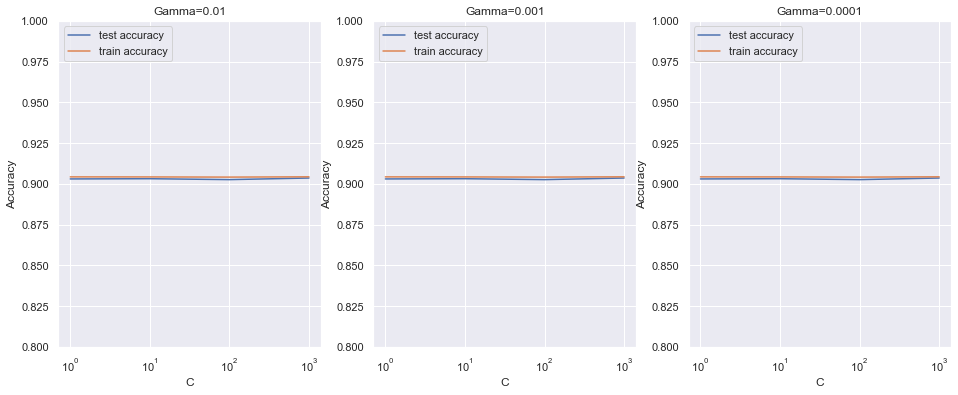

In [107]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [108]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print('The best test score is {0:.4f} corresponding to hyperparameters {1}'.format(best_score, best_hyperparams))

The best test score is 0.9036 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [109]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"linear"}

# model
model = SVC(C=100, gamma=0.0001, kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print('Accuracy {:.4f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision {:.4}'.format(metrics.precision_score(y_test, y_pred)))
print('Sensitivity/Recall {:.4}'.format(metrics.recall_score(y_test, y_pred)))

[[2496   77]
 [ 200  266]] 

Accuracy 0.9089
Precision 0.9258
Sensitivity/Recall 0.9701


# Bank Churners Classification Using Logistic Regression

* Logistic Regression is used for predicting categorical binary outcomes ----> Churn or Not.

* https://learn.theprogrammingfoundation.org/getting_started/intro_data_science/module4/?gclid=CjwKCAjw586hBhBrEiwAQYEnHZpob82x7H4VRrVavIduVNwN88hB4VBMjkk6vmqTOiuifUU4pqlVPRoCUWYQAvD_BwE

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Splitting the data into the training set (80%) and the testing set (20%)

In [112]:
# 80% training 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=102) 

In [113]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (8101, 19), (2026, 19), (8101,), (2026,))

In [114]:
# Create Logistic Regression
lr = LogisticRegression()

# Train model on training set
lr.fit(X_train, y_train)

# Make predictions on testing set
y_pred = lr.predict(X_test)

### Evaluating Model

In [115]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8894
Confusion matrix:
 [[1662   68]
 [ 156  140]]


#### Splitting the data into the training set (90%) and the testing set (10%)

In [116]:
# 90% training 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=102) 

In [117]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (9114, 19), (1013, 19), (9114,), (1013,))

In [118]:
# Create Logistic Regression
lr = LogisticRegression()

# Train model on training set
lr.fit(X_train, y_train)

# Make predictions on testing set
y_pred = lr.predict(X_test)

### Evaluating Model

In [119]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9042
Confusion matrix:
 [[844  27]
 [ 70  72]]


#### Splitting the data into the training set (70%) and the testing set (30%)

In [120]:
# 70% training 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=109)

In [121]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (7088, 19), (3039, 19), (7088,), (3039,))

In [122]:
# Create Logistic Regression
lr = LogisticRegression()

# Train model 
lr.fit(X_train, y_train)

# Predict the result
y_pred = lr.predict(X_test)

### Evaluating Model

In [123]:
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8940
Confusion matrix:
 [[2493   80]
 [ 242  224]]


# Bank Churners Classification Using Random Forest

In [124]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
# evaluation metrics
from sklearn.metrics import classification_report

#### Splitting the data into the training set (80%) and the testing set (20%)

In [125]:
# 80% training 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 102)

In [126]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (8101, 19), (2026, 19), (8101,), (2026,))

## SMOTE 

In [127]:
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [128]:
print('Class distribution before SMOTE: \n', pd.Series(y_train).value_counts())
print('\nClass distribution after SMOTE: \n', pd.Series(y_train_res).value_counts())

Class distribution before SMOTE: 
 1    6770
2    1331
Name: Attrition_Flag, dtype: int64

Class distribution after SMOTE: 
 1    6770
2    6770
Name: Attrition_Flag, dtype: int64


In [129]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=102)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [130]:
# Fit RF on the resampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [131]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.98      1730
           2       0.83      0.91      0.87       296

    accuracy                           0.96      2026
   macro avg       0.91      0.94      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [133]:
# Create Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

# Predict the result
y_pred = clf_RF.predict(X_test)

In [134]:
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9610
Confusion matrix:
 [[1709   21]
 [  58  238]]


#### Splitting the data into the training set (90%) and the testing set (10%)

In [135]:
# 90% training 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 102)

In [136]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (9114, 19), (1013, 19), (9114,), (1013,))

## SMOTE 

In [137]:
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [138]:
print('Class distribution before SMOTE: \n', pd.Series(y_train).value_counts())
print('\nClass distribution after SMOTE: \n', pd.Series(y_train_res).value_counts())

Class distribution before SMOTE: 
 1    7629
2    1485
Name: Attrition_Flag, dtype: int64

Class distribution after SMOTE: 
 1    7629
2    7629
Name: Attrition_Flag, dtype: int64


In [139]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=102)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [140]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.97      0.98       871
           2       0.84      0.88      0.86       142

    accuracy                           0.96      1013
   macro avg       0.91      0.93      0.92      1013
weighted avg       0.96      0.96      0.96      1013



In [142]:
# Create Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

# Predict the result
y_pred = clf_RF.predict(X_test)

In [143]:
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9733
Confusion matrix:
 [[864   7]
 [ 20 122]]


#### Splitting the data into the training set (70%) and the testing set (30%)

In [144]:
# 70% training 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 109)

In [145]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (7088, 19), (3039, 19), (7088,), (3039,))

## SMOTE

In [146]:
smt = SMOTE()
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

In [147]:
print('Class distribution before SMOTE: \n', pd.Series(y_train).value_counts())
print('\nClass distribution after SMOTE: \n', pd.Series(y_train_res).value_counts())

Class distribution before SMOTE: 
 1    5927
2    1161
Name: Attrition_Flag, dtype: int64

Class distribution after SMOTE: 
 1    5927
2    5927
Name: Attrition_Flag, dtype: int64


In [148]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=109)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [149]:
# Predict on the test set
y_pred = rf.predict(X_test)

In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      2573
           2       0.97      0.98      0.97       466

    accuracy                           0.99      3039
   macro avg       0.98      0.99      0.98      3039
weighted avg       0.99      0.99      0.99      3039



In [151]:
# Create Random Forest Classifier
clf_RF = RandomForestClassifier(n_estimators = 1000)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

# Predict the result
y_pred = clf_RF.predict(X_test)

In [152]:
# Model Accuracy, how often is the classifier correct?
print( "Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9645
Confusion matrix:
 [[2548   25]
 [  83  383]]


## Hyperparameter Tuning

### Tuning max_depth

In [153]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [154]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.3110,0.0083,0.0186,0.0012,2,{'max_depth': 2},0.8752,0.8575,0.8688,0.8504,0.8560,0.8616,0.0091,4
1,0.6490,0.0154,0.0253,0.0023,7,{'max_depth': 7},0.9316,0.9379,0.9408,0.9358,0.9301,0.9352,0.0039,3
2,0.8360,0.0153,0.0289,0.0014,12,{'max_depth': 12},0.9563,0.9563,0.9556,0.9548,0.9520,0.9550,0.0016,2
3,0.8797,0.0080,0.0307,0.0017,17,{'max_depth': 17},0.9549,0.9605,0.9577,0.9577,0.9562,0.9574,0.0019,1


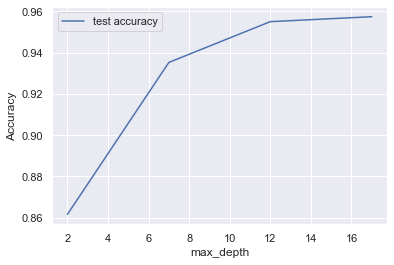

In [155]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters
* We can now find the optimal hyperparameters using GridSearchCV.

In [156]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [157]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [158]:
# printing the optimal accuracy score and hyperparameters
accuracy = '{:.4f}'.format(grid_search.best_score_)
print('We can get accuracy of', accuracy, 'using', grid_search.best_params_)

We can get accuracy of 0.9000 using {'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [159]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [160]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [161]:
# predict
predictions = rfc.predict(X_test)

In [162]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [163]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      0.98      0.95      2573
           2       0.83      0.61      0.71       466

    accuracy                           0.92      3039
   macro avg       0.88      0.79      0.83      3039
weighted avg       0.92      0.92      0.92      3039



In [164]:
print("Accuracy: {:.4f}".format(accuracy_score(y_test,predictions)))
print(confusion_matrix(y_test,predictions))

Accuracy: 0.9217
[[2516   57]
 [ 181  285]]


# Bank Churners Classification Using Gaussian Naive Bayes

In [165]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Import Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

#### Splitting the data into the training set (80%) and the testing set (20%)

In [166]:
# 80% training 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=102) 

In [167]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (8101, 19), (2026, 19), (8101,), (2026,))

### Model Generation
After splitting, we will generate a GNB model on the training set and perform prediction on test set features.

In [168]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

### Evaluating Model
After model generation, check the accuracy using actual and predicted values.

In [169]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8978
Confusion matrix:
 [[1636   94]
 [ 113  183]]


In [1]:
(1636+183)/(1636+183+113+94)

0.8978282329713722

### Use of Cross Validation

In [171]:
#Create a Gaussian Classifier
gnb = GaussianNB()

# Calculate the score using cross validation method
scores = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=5)

print('CV Mean: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean: 0.8901
STD: 0.0077


## Use of Cross Validation - Performance on the entire dataset
* X = Continuous Variables of the dataset
* y = Target variable of the dataset

In [172]:
#Create a Gaussian Classifier
gnb = GaussianNB()

# Calculate the score using cross validation method
scores = cross_val_score(gnb, X, y, scoring='accuracy', cv=5)

print('CV Mean: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean: 0.8465
STD: 0.0970


#### Splitting the data into the training set (90%) and the testing set (10%)

In [173]:
# 90% training 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=102) 

In [174]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (9114, 19), (1013, 19), (9114,), (1013,))

### Model Generation
After splitting, we will generate a GNB model on the training set and perform prediction on test set features.

In [175]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

### Evaluating Model
After model generation, check the accuracy using actual and predicted values.

In [176]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9082
Confusion matrix:
 [[827  44]
 [ 49  93]]


### Use of Cross Validation


In [177]:
#Create a Gaussian Classifier
gnb = GaussianNB()

# Calculate the score using cross validation method
scores = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=5)

print('CV Mean: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean: 0.8912
STD: 0.0076


#### Splitting the data into the training set (70%) and the testing set (30%)

In [178]:
# 70% training 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=109) 

In [179]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10127, 19), (10127,), (7088, 19), (3039, 19), (7088,), (3039,))

### Model Generation
After splitting, we will generate a GNB model on the training set and perform prediction on test set features.

In [180]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

### Evaluating Model
After model generation, check the accuracy using actual and predicted values.

In [181]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8970
Confusion matrix:
 [[2450  123]
 [ 190  276]]


### Use of Cross Validation

In [182]:
#Create a Gaussian Classifier
gnb = GaussianNB()

# Calculate the score using cross validation method
scores = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=5)

print('CV Mean: {:.4f}'.format(np.mean(scores)))
print('STD: {:.4f}'.format(np.std(scores)))

CV Mean: 0.8922
STD: 0.0075


#  Principal Component Analysis

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA().fit(X)

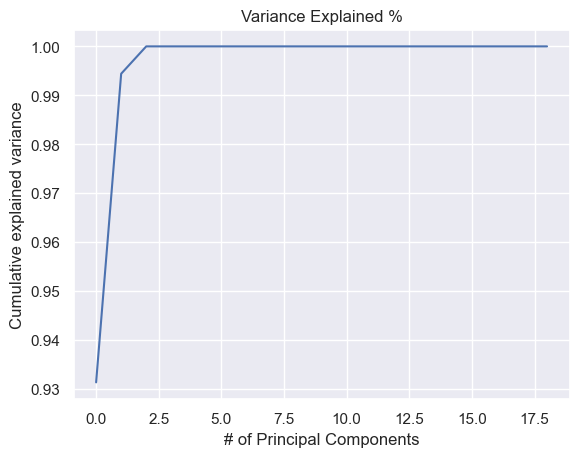

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Variance Explained %');

In [62]:
pca2 = PCA(n_components=3)
pca2.fit(X)
X_pca = pca2.transform(X)

print('Original Shape {}'.format(X.shape))
print('Transformed Shape {}'.format(X_pca.shape))

Original Shape (10127, 19)
Transformed Shape (10127, 3)


In [63]:
print(pca2.explained_variance_)

(1.65267903e+08 + 1.11919908e+07 + 9.91580302e+05 + 1.90287220e+02)

[1.65267903e+08 1.11919908e+07 9.91580302e+05]


177451664.38922

In [64]:
total_var = np.sum(pca2.explained_variance_)
print(X_pca, total_var)

[[ 5850.14983967 -3553.80631735  -395.44053215]
 [ -469.10656438 -3101.45665811  -299.35221   ]
 [-6664.30348218 -2230.72953324 -1377.25890188]
 ...
 [-3449.24977828  6026.92763841 -1554.62468159]
 [-3720.88595966  4142.25509778 -1514.09038855]
 [ 2198.84911432  5810.81076499   852.97995576]] 177451474.2595979


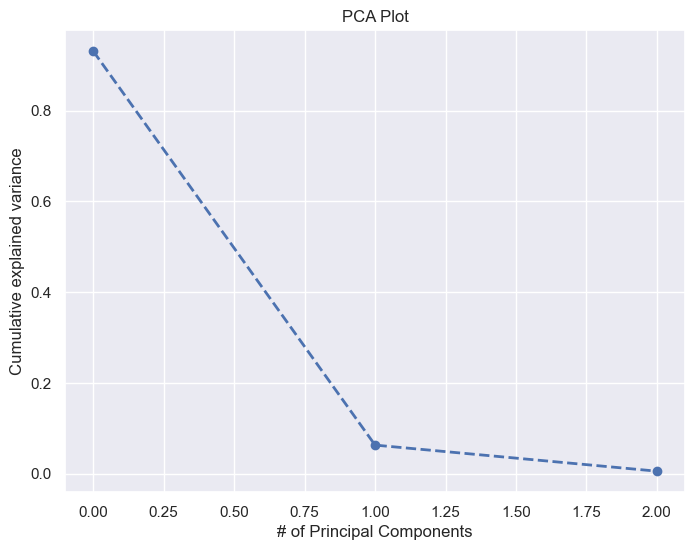

In [65]:
pca2 =PCA(n_components=3)
pca2.fit(X)

fig, ax0 = plt.subplots(nrows=1, sharex=True, figsize=(8, 6))
ax0.plot(pca2.explained_variance_ratio_, linewidth=2, marker='o', linestyle='--')
ax0.set_ylabel('Cumulative explained variance')
plt.xlabel('# of Principal Components')
plt.title('PCA Plot')
plt.show()

https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m